# Dog breed identification using TensorFlow, Deep Learning and Transfer Learning (work in progress)

* **Project:** Dog Vision 🐶👁 - Using computer vision to classify dog photos into different breeds.
* **Goals:** Learn TensorFlow, deep learning and transfer learning, beat the original research paper results (22% accuracy).
* **Domain:** Computer vision.
* **Data:** Images of dogs from [Stanford Dogs Dataset](http://vision.stanford.edu/aditya86/ImageNetDogs/) (120 dog breeds, 20,000+ images).
* **Problem type:** Multi-class classification (120 different classes).
* **Runtime:** This project is designed to run end-to-end in [Google Colab](https://colab.research.google.com/) (for free GPU access and easy setup). If you'd like to run it locally, it will require environment setup.
* **Demo:** See a [demo of the trained model running on Hugging Face Spaces](https://huggingface.co/spaces/mrdbourke/dog_vision).

Welcome, welcome!

The focus of this notebook is to give a quick overview of deep learning with TensorFlow/Keras.

How?

We're going to go through the machine learning workflow steps and build a computer vision project to classify photos of dogs into their respective dog breed (a Predictive AI task, see below for more).

<img src="https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/images/unstructured-data-dog-vision-project-outline.png?raw=true" width=750 alt="outline of dog vision project from taking a dataset of dog images and then creating a neural network for identifying different dogs in custom images"/>

*What we're going to build: Dog Vision 🐶👁️, a neural network capable of identifying different dog breeds in images. All the way from dataset preparation to model building, training and evaluation.*

In [ ]:
# Quick timestamp
import datetime
print(f"Last updated: {datetime.datetime.now()}")

Last updated: 2024-05-23 15:23:10.291920


## What we're going to cover

In this project, we're going to be introduced to the power of deep learning and more specifically, transfer learning using TensorFlow/Keras.

We'll go through each of these in the context of the 6 step machine learning framework

1. **Problem defintion** - Use computer vision to classify photos of dogs into different dog breeds.
2. **Data** - 20,000+ images of dogs from 120 different dog breeds from the [Stanford Dogs dataset](http://vision.stanford.edu/aditya86/ImageNetDogs/).
3. **Evaluation** - We'd like to beat the original paper's results (22% mean accuracy across all classes, **tip:** A good way to practice your skills is to find some results online and try to beat them).
4. **Features** - Because we're using deep learning, our model will learn the features on its own.
5. **Modelling** - We're going to use a pretrained convolutional neural network (CNN) and transfer learning.
6. **Experiments** - We'll try different amounts of data with the same model to see the effects on our results.

## Table of contents

1. Getting Setup
2. Getting Data (dog images and their breeds)
3. Exploring the data (exploratory data analysis)
4. Creating training and test splits
5. Turning our datasets into TensorFlow Dataset(s)
6. Creating a neural network with TensorFlow
7. Model 0 - Train a model on 10% of the training data
8. Putting it all together: create, compile, fit
9. Model 1 - Train a model on 100% of the training data
10. Make and evaluate predictions of the best model
11. Save and load the best model
12. Make predictions on custom images with the best model (bringing Dog Vision 🐶👁️ to life!)
13. Key takeaways
14. Extensions & exercises

## Quick definitions

Let's start by breaking down some of the most important topics we're going to go through.

### What is TensorFlow/Keras?

[TensorFlow](https://www.tensorflow.org/) is an open source machine learning and deep learning framework originally developed by Google. Inside TensorFlow, you can also use [Keras](https://keras.io/) which is another very helpful machine learning framework known for its ease of use.

### Why use TensorFlow?

TensorFlow allows you to manipulate data and write deep learning algorithms using Python code.

It also has several built-in capabilities to leverage accelerated computing hardware (e.g. GPUs, Graphics Processing Units and TPUs, Tensor Processing Units).

Many of world's largest companies [power their machine learning workloads with TensorFlow](https://www.tensorflow.org/about/case-studies).

### What is deep learning?

[Deep learning](https://en.wikipedia.org/wiki/Deep_learning) is a form of machine learning where data passes through a series of progressive layers which all contribute to learning an overall representation of that data.

Each layer performs a pre-defined operation.

The series of progressive layers combine to form what's referred to as a [**neural network**](https://en.wikipedia.org/wiki/Artificial_neural_network).

For example, a photo may be turned into numbers (e.g. red, green and blue pixel values) and those numbers are then manipulated mathematically through each progressive layer to learn patterns in the photo.

The "deep" in deep learning comes from the number of layers used in the neural network.

So when someone says deep learning or (artificial neural networks), they're typically referring to same thing.

> **Note:** Artificial intelligence (AI), machine learning (ML) and deep learning are all broad terms. You can think of AI as the overall technology, machine learning as a type of AI, and deep learning as a type of machine learning. So if someone refers to AI, you can often assume they are often talking about machine learning or deep learning.

### What is transfer learning?

[Transfer learning](https://en.wikipedia.org/wiki/Transfer_learning) is one of the most powerful and useful techniques in modern AI and machine learning.

It involves taking what one model (or neural network) has learned in a similar domain and applying to your own.

In our case, we're going to use transfer learning to take the patterns a neural network has learned from the 1 million+ images and over 1000 classes in [ImageNet](https://www.image-net.org/) (a gold standard computer vision benchmark) and apply them to our own problem of recognizing dog breeds.

However, this concept can be applied to many different domains.

You could take a large language model (LLM) that has been pre-trained on *most* of the text on the internet and learned very well the patterns in naturual language and customize it for your own specific chat use-case.

The biggest benefit of transfer learning is that it often allows you to get outstanding results with less data and time.

<img src="https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/images/unstructured-data-a-transfer-learning-workflow.png?raw=true" width=750 alt='This image is an infographic that explains the process of using pre-trained models from Hugging Face and Keras to apply to custom data. The top section asks, "Does my problem exist on Hugging Face/Keras?" indicating a starting point for a solution search. The left section shows the ImageNet database webpage, representing a large dataset, leading into the center where a network graph signifies a "Pretrained Model." This model is then applied to custom data, illustrated by a diagram featuring various dog images being processed and resulting in checkmarks, implying successful identification or classification. At the bottom, it emphasizes that "Keras applications make using a pre-trained model as simple as calling a Python class," with a specific code example given for EfficientNet V2. The overall message is that these tools can handle various data types, not just images, and simplify machine learning tasks.'/>

*A transfer learning workflow. Many publicly available models have been pretrained on large datasets such as ImageNet (1 million+ images). These models can then be applied to similar tasks downstream. For example, we can take a model pretrained on ImageNet and apply it to our Dog Vision 🐶👁️ problem. This same process can be repeated for many different styles of data and problem.*

## 1. Getting setup

This notebook is designed to run in [Google Colab](https://colab.research.google.com/), an online Jupyter Notebook that provides free access to GPUs (Graphics Processing Units, we'll hear more on these later).

For a quick rundown on how to use Google Colab, see their [introductory guide](https://colab.research.google.com/notebooks/basic_features_overview.ipynb) (it's quite similar to a Jupyter Notebook with a few different options).

Google Colab also comes with many data science and machine learning libraries pre-installed, including TensorFlow/Keras.

### Getting a GPU on Google Colab

Before running any code, we'll make sure our Google Colab instance is connected to a GPU.

You can do this via going to Runtime -> Change runtime type -> GPU (this may restart your existing runtime).

Why use a GPU?

Since neural networks perform a large amount of calculations behind the scenes (the main one being [matrix multiplication](https://en.wikipedia.org/wiki/Matrix_multiplication)), you need a computer chip that perform these calculations quickly, otherwise you'll be waiting all day for a model to train.

And in short, GPUs are much faster at performing matrix multiplications than CPUs.

Why this is the case is behind the scope of this project (you can search "why are GPUs faster than CPUs for machine learning?" for more).

The main thing to remember is: generally, in deep learning, GPUs = faster than CPUs.

> **Note:** A good experiment would be to run the neural networks we're going to build later on with and without a GPU and see the difference in their training times.

Ok, enough talking, let's start by importing TensorFlow!

We'll do so using the common abbreviation `tf`.

In [ ]:
import tensorflow as tf
tf.__version__

'2.15.0'

Nice!

> **Note:** If you want to run TensorFlow locally, you can follow the [TensorFlow installation guide](https://www.tensorflow.org/install).

Now let's check to see if TensorFlow has access to a GPU (this isn't 100% required to complete this project but will speed things up dramatically).

We can do so with the method [`tf.config.list_physical_devices()`](https://www.tensorflow.org/api_docs/python/tf/config/list_physical_devices).

In [ ]:
# Do we have access to a GPU?
device_list = tf.config.list_physical_devices()
if "GPU" in [device.device_type for device in device_list]:
  print(f"[INFO] TensorFlow has GPU available to use. Woohoo!! Computing will be sped up!")
  print(f"[INFO] Accessible devices:\n{device_list}")
else:
  print(f"[INFO] TensorFlow does not have GPU available to use. Models may take a while to train.")
  print(f"[INFO] Accessible devices:\n{device_list}")

[INFO] TensorFlow has GPU available to use. Woohoo!! Computing will be sped up!
[INFO] Accessible devices:
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## 2. Getting Data

All machine learning (and deep learning) projects start with data.

If you have no data, you have no project.

If you have no project, you have no cool models to show your friends or improve your business.

Not to worry!

There are several options and locations to get data for a deep learning project.

| Resource | Description |
| :----- | :----- |
| [Kaggle Datasets](https://www.kaggle.com/datasets) | A collection of datasets across a wide range of topics. |
| [TensorFlow Datasets](https://www.tensorflow.org/datasets) | A collection of ready-to-use machine learning datasets ready for use under the `tf.data.Datasets` API. You can see a list of [all available datasets](https://www.tensorflow.org/datasets/catalog/overview#all_datasets) in the TensorFlow documentation. |
| [Hugging Face Datasets](https://huggingface.co/datasets) | A continually growing resource of datasets broken into several different kinds of topics. |
| [Google Dataset Search](https://datasetsearch.research.google.com/) | A search engine by Google specifically focused on searching online datasets. |
| Original sources | Datasets which are made available by researchers or companies with the release of a product or research paper (sources for these will vary, they could be a link on a website or a link to an application form). |
| Custom datasets | These are datasets comprised of your own custom source of data. You may build these from scratch on your own or have access to them from an existing product or service. For example, your entire photos library could be your own custom dataset or your entire notes and documents folder or your company's customer order history. |

In our case, the dataset we're going to use is called the Stanford Dogs dataset (or ImageNet dogs, as the images are dogs separated from ImageNet).

Because the Stanford Dogs dataset has been around for a while (since 2011, which as of writing this in 2024 is like a lifetime in deep learning), it's available from several resources:

* The [original project website](http://vision.stanford.edu/aditya86/ImageNetDogs/) via link download.
* Inside [TensorFlow datasets under `stanford_dogs`](https://www.tensorflow.org/datasets/catalog/stanford_dogs).
* On [Kaggle as a downloadable dataset](https://www.kaggle.com/datasets/jessicali9530/stanford-dogs-dataset).

The point here is that when you're starting out with practicing deep learning projects, there's no shortage of datasets available.

However, when you start wanting to work on your own projects or within a company environment, you'll likely start to work on custom datasets (datasets you build yourself or aren't available publicly online).

The main difference between existing datasets and custom datasets is that existing datasets often come preformatted and ready to use.

Where as custom datasets often require some preprocessing before they're ready to use within a machine learning project.

To practice formatting a dataset for a machine learning problem, we're going to download the Stanford Dogs dataset from the original website.

Before we do so, the following code is an example of how we'd get the Stanford Dogs dataset from [TensorFlow Datasets](https://www.tensorflow.org/datasets).

In [ ]:
# Download the dataset into train and test split using TensorFlow Datasets
# import tensorflow_datasets as tfds
# ds_train, ds_test = tfds.load('stanford_dogs', split=['train', 'test'])

### Download data directly from Stanford Dogs website

Our overall project goal is to build a computer vision model which performs better than the original Stanford Dogs paper (average of 22% accuracy per class across 120 classes).

To do so, we need some data.

Let's download the original Stanford Dogs dataset from the project website.

The data comes in three main files:

1. [Images](http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar) (757MB) - `images.tar`
3. [Annotations](http://vision.stanford.edu/aditya86/ImageNetDogs/annotation.tar) (21MB) - `annotation.tar`
3. [Lists](http://vision.stanford.edu/aditya86/ImageNetDogs/lists.tar) with train/test splits (0.5MB) - `lists.tar`

Our goal is to get a file structure like this:

<img src="https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/images/unstructured-data-dog-vision-file-structure.png?raw=true" width=600 alt="dog vision data file structure with images.tar, annotation.tar and lists.tar"/>

> **Note:** If you're using Google Colab for this project, remember that any data uploaded to the Google Colab session gets deleted if the session disconnects. So to save us redownloading the data every time, we're going to download it once and save it to Google Drive.
>
> **Resource:** For a good guide on getting data in and out of Google Colab, see the [Google Colab `io.ipynb` tutorial](https://colab.research.google.com/notebooks/io.ipynb#scrollTo=RWSJpsyKqHjH).

To make sure we don't have to keep redownloading the data every time we leave and come back to Google Colab, we're going to:

1. Download the data if it doesn't already exist on Google Drive.
2. Copy it to Google Drive (because Google Colab connects nicely with Google Drive) if it isn't already there.
3. If the data already exists on Google Drive (we've been through steps 1 & 2), we'll import it instead.

There are two main options to connect Google Colab instances to Google Drive:

1. Click "Mount Drive" in "Files" menu on the left.
2. Mount programmatically with `from google.colab import drive` -> `drive.mount('/content/drive')`.

More specifically, we're going to follow the following steps:

1. Mount Google Drive.
2. Setup constants such as our base directory to save files to, the target files we'd like to download and target URL we'd like to download from.
3. Setup our target local path to save to.
4. Check if the target files all exist in Google Drive and if they do, copy them locally.
5. If the target files don't exist in Google Drive, download them from the target URL with the [`!wget`](https://www.gnu.org/software/wget/manual/wget.html) command.
6. Create a file on Google Drive to store the download files.
7. Copy the downloaded files to Google Drive for use later if needed.

A fair few steps, but nothing we can't handle!

Plus, this is all good practice for dealing with and manipulating data, a very important skill in the machine learning engineers toolbox.

> **Note:** The following data download section is designed to run in Google Colab. If you are running locally, feel free to modify the code to save to a local directory instead of Google Drive.

In [ ]:
from pathlib import Path
from google.colab import drive

In [ ]:
# 1. Mount Google Drive (this will bring up a pop-up to sign-in/authenticate)
# Note: This step is specifically for Google Colab, if you're working locally, you may need a different setup
drive.mount("/content/drive")

# 2. Setup constants
# Note: For constants like this, you'll often see them created as variables with all capitals
TARGET_DRIVE_PATH = Path("drive/MyDrive/tensorflow/dog_vision_data")
TARGET_FILES = ["images.tar", "annotation.tar", "lists.tar"]
TARGET_URL = "http://vision.stanford.edu/aditya86/ImageNetDogs"

# 3. Setup local path
local_dir = Path("dog_vision_data")

# 4. Check if the target files exist in Google Drive, if so, copy them to Google Colab
if all((TARGET_DRIVE_PATH / file).is_file() for file in TARGET_FILES):
  print(f"[INFO] Copying Dog Vision files from Google Drive to local directory...")
  print(f"[INFO] Source dir: {TARGET_DRIVE_PATH} -> Target dir: {local_dir}")
  !cp -r {TARGET_DRIVE_PATH} .
  print("[INFO] Good to go!")

else:
  # 5. If the files don't exist in Google Drive, download them
  print(f"[INFO] Target files not found in Google Drive.")
  print(f"[INFO] Downloading the target files... this shouldn't take too long...")
  for file in TARGET_FILES:
    # wget is short for "world wide web get", as in "get a file from the web"
    # -nc or --no-clobber = don't download files that already exist locally
    # -P = save the target file to a specified prefix, in our case, local_dir
    !wget -nc {TARGET_URL}/{file} -P {local_dir} # the "!" means to execute the command on the command line rather than in Python

  print(f"[INFO] Saving the target files to Google Drive, so they can be loaded later...")

  # 6. Ensure target directory in Google Drive exists
  TARGET_DRIVE_PATH.mkdir(parents=True, exist_ok=True)

  # 7. Copy downloaded files to Google Drive (so we can use them later and not have to re-download them)
  !cp -r {local_dir}/* {TARGET_DRIVE_PATH}/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[INFO] Copying Dog Vision files from Google Drive to local directory...
[INFO] Source dir: drive/MyDrive/tensorflow/dog_vision_data -> Target dir: dog_vision_data
[INFO] Good to go!


Data downloaded!

Nice work! This may seem like a bit of work but it's an important step with any deep learning project. Getting data to work with.

Now if we get the contents of `local_dir` (`dog_vision_data`), what do we get?

We can first make sure it exists with [`Path.exists()`](https://docs.python.org/3/library/pathlib.html#pathlib.Path.exists) and then we can iterate through its contents with [`Path.iterdir()`](https://docs.python.org/3/library/pathlib.html#pathlib.Path.iterdir) and print out the [`.name`](https://docs.python.org/3/library/pathlib.html#pathlib.PurePath.name) attribute of each file.

In [ ]:
if local_dir.exists():
  print(str(local_dir) + "/")
  for item in local_dir.iterdir():
    print("  ", item.name)

dog_vision_data/
   images.tar
   annotation.tar
   lists.tar


Excellent! That's exactly the format we wanted.

Now you might've noticed that each file ends in `.tar`.

What's this?

Searching "what is .tar?", I found:

> *In computing, tar is a computer software utility for collecting many files into one archive file, often referred to as a tarball, for distribution or backup purposes.*
>
> Source: [Wikipedia tar page](https://en.wikipedia.org/wiki/Tar_(computing)).

Exploring a bit more, I found that the `.tar` format is similar to `.zip`, however, `.zip` offers compression, where as `.tar` mostly combines many files into one.

So how do we "untar" the files in `images.tar`, `annotation.tar` and `lists.tar`?

We can use the [`!tar`](https://www.gnu.org/software/tar/manual/tar.html) command (or just `tar` from outside of a Jupyter Cell)!

Doing this will expand all of the files within each of the `.tar` archives.

We'll also use a couple of flags to help us out:
* The `-x` flag tells `tar` to extract files from an archive.
* The `-f` flag specifies that the following argument is the name of the archive file.
* You can combine flags by putting them together `-xf`.

Let's try it out!

In [ ]:
# Untar images, notes/tags:
# -x = extract files from the zipped file
# -v = verbose
# -z = decompress files
# -f = tell tar which file to deal with
!tar -xf dog_vision_data/images.tar
!tar -xf dog_vision_data/annotation.tar
!tar -xf dog_vision_data/lists.tar

What new files did we get?

We can check in Google Colab by inspecting the "Files" tab on the left.

Or with Python by using [`os.listdir(".")`](https://docs.python.org/3/library/os.html#os.listdir) where `"."` means "the current directory".

In [ ]:
import os

os.listdir(".") # "." stands for "here" or "current directory"

['.config',
 'Images',
 'train_list.mat',
 'file_list.mat',
 'dog_vision_data',
 'Annotation',
 'drive',
 'test_list.mat',
 'sample_data']

Ooooh!

Looks like we've got some new files!

Specifically:

* `train_list.mat` - a list of all the training set images.
* `test_list.mat` - a list of all the testing set images.
* `Images/` - a folder containing all of the images of dogs.
* `Annotation/` - a folder containing all of the annotations for each image.
* `file_list.mat` - a list of all the files (training and test list combined).

Our next step is to go through them and see what we've got.



## 3. Exploring the data

Once you've got a dataset, before building a model, it's wise to explore it for a bit to see what kind of data you're working with.

Exploring a dataset can mean many things.

But a few rules of thumb when exploring new data:
* **View at least 100+ random samples for a "vibe check".** For example, if you have a large dataset of images, randomly sample 10 images at a time and view them. Or if you have a large dataset of texts, what do some of them say? The same with audio. It will often be impossible to view all samples in your dataset, but you can start to get a good idea of what's inside by randomly inspecting samples.
* ***Visualize, viuslaize, visualize!*** This is the data explorer's motto. Use it often. As in, it's good to get statistics about your dataset but it's often even better to view 100s of samples with your own eyes (see the point above).
* **Check the distributions and other various statistics.** How many samples are there? If you're dealing with classification, how many classes and labels per class are there? Which classes don't you understand? If you don't have labels, investigate [clustering methods](https://developers.google.com/machine-learning/clustering/overview) to put similar samples close together.

### Our target data format

Since our goal is to build a computer vision model to classify dog breeds, we need a way to tell our model what breed of dog is in what image.

A common data format for a classification problem is to have samples stored in folders named after their class name.

For example:

<img src="https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/images/unstructured-data-image-folder-structure.png?raw=true" width=600 alt="example directory structure of images for an image classification problem"/>

In the case of dog images, we'd put all of the images labelled "chihuahua" in a folder called `chihuahua/` (and so on for all the other classes and images).

We could split these folders so that training images go in `train/chihuahua/` and testing images go in `test/chihuahua/`.

This is what we'll be working towards creating.

> **Note:** This structure of folder format doesn't just work for only images, it can work for text, audio and other kind of classification data too.


### Exploring the file lists

How about we check out the `train_list.mat`, `test_list.mat` and `full_list.mat` files?

Searching online, for "what is a .mat file?", I found that [it's a MATLAB file](https://www.mathworks.com/help/matlab/import_export/mat-file-versions.html). Before Python became the default language for machine learning and deep learning, many models and datasets were built in [MATLAB](https://www.mathworks.com/products/matlab.html).

Then I searched, "how to open a .mat file with Python?" and found an [answer on Stack Overflow](https://stackoverflow.com/questions/874461/read-mat-files-in-python) saying I could use the [`scipy` library](https://scipy.org/) (a scientific computing library).

The good news is, Google Colab comes with `scipy` preinstalled.

We can use the [`scipy.io.loadmat()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.loadmat.html) method to open a `.mat` file.

In [ ]:
import scipy

# Open lists of train and test .mat
train_list = scipy.io.loadmat("train_list.mat")
test_list = scipy.io.loadmat("test_list.mat")
file_list = scipy.io.loadmat("file_list.mat")

# Let's inspect the output and type of the train_list
train_list, type(train_list)

({'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct  9 08:36:13 2011',
  '__version__': '1.0',
  '__globals__': [],
  'file_list': array([[array(['n02085620-Chihuahua/n02085620_5927.jpg'], dtype='<U38')],
         [array(['n02085620-Chihuahua/n02085620_4441.jpg'], dtype='<U38')],
         [array(['n02085620-Chihuahua/n02085620_1502.jpg'], dtype='<U38')],
         ...,
         [array(['n02116738-African_hunting_dog/n02116738_6754.jpg'], dtype='<U48')],
         [array(['n02116738-African_hunting_dog/n02116738_9333.jpg'], dtype='<U48')],
         [array(['n02116738-African_hunting_dog/n02116738_2503.jpg'], dtype='<U48')]],
        dtype=object),
  'annotation_list': array([[array(['n02085620-Chihuahua/n02085620_5927'], dtype='<U34')],
         [array(['n02085620-Chihuahua/n02085620_4441'], dtype='<U34')],
         [array(['n02085620-Chihuahua/n02085620_1502'], dtype='<U34')],
         ...,
         [array(['n02116738-African_hunting_dog/n02116738_6754'], dtype=

Okay, looks like we get a dictionary with several fields we may be interested in.

Let's check out the keys of the dictionary.

In [ ]:
train_list.keys()

dict_keys(['__header__', '__version__', '__globals__', 'file_list', 'annotation_list', 'labels'])

My guess is that the `file_list` key is what we're after, as this looks like a large array of image names (the files all end in `.jpg`).

How about we see how many files are in each `file_list` key?

In [ ]:
# Check the length of the file_list key
print(f"Number of files in training list: {len(train_list['file_list'])}")
print(f"Number of files in testing list: {len(test_list['file_list'])}")
print(f"Number of files in full list: {len(file_list['file_list'])}")

Number of files in training list: 12000
Number of files in testing list: 8580
Number of files in full list: 20580


Beautiful! Looks like these lists contain our training and test splits and the full list has a list of all the files in the dataset.

Let's inspect the `train_list['file_list']` further.

In [ ]:
train_list['file_list']

array([[array(['n02085620-Chihuahua/n02085620_5927.jpg'], dtype='<U38')],
       [array(['n02085620-Chihuahua/n02085620_4441.jpg'], dtype='<U38')],
       [array(['n02085620-Chihuahua/n02085620_1502.jpg'], dtype='<U38')],
       ...,
       [array(['n02116738-African_hunting_dog/n02116738_6754.jpg'], dtype='<U48')],
       [array(['n02116738-African_hunting_dog/n02116738_9333.jpg'], dtype='<U48')],
       [array(['n02116738-African_hunting_dog/n02116738_2503.jpg'], dtype='<U48')]],
      dtype=object)

Looks like we've got an array of arrays.

How about we turn them into a Python list for easier handling?

We can do so by extracting each individual item via indexing and list comprehension.

Let's see what it's like to get a single file name.

In [ ]:
# Get a single filename
train_list['file_list'][0][0][0]

'n02085620-Chihuahua/n02085620_5927.jpg'

Now let's get a Python list of all the individual file names (e.g. `n02085620-Chihuahua/n02085620_5927.jpg`) so we can use them later.

In [ ]:
# Get a Python list of all file names for each list
train_file_list = list([item[0][0] for item in train_list["file_list"]])
test_file_list = list([item[0][0] for item in test_list["file_list"]])
full_file_list = list([item[0][0] for item in file_list["file_list"]])

len(train_file_list), len(test_file_list), len(full_file_list)

(12000, 8580, 20580)

Wonderful!

How about we view a random sample of the filenames we extracted?

> **Note:** One of my favourite things to do whilst exploring data is to continually view random samples of it. Whether it be file names or images or text snippets. Why? You can always view the first X number of samples, however, I find that continually viewing random samples of the data gives you a better of overview of the different kinds of data you're working with. It also gives you the small chance of stumbling upon a potential error.

We can view random samples of the data using Python's [`random.sample()`](https://docs.python.org/3/library/random.html#random.sample) method.

In [ ]:
import random

random.sample(train_file_list, k=10)

['n02091831-Saluki/n02091831_3909.jpg',
 'n02105162-malinois/n02105162_7041.jpg',
 'n02110958-pug/n02110958_12224.jpg',
 'n02086646-Blenheim_spaniel/n02086646_2426.jpg',
 'n02109525-Saint_Bernard/n02109525_12041.jpg',
 'n02098105-soft-coated_wheaten_terrier/n02098105_1321.jpg',
 'n02112350-keeshond/n02112350_7789.jpg',
 'n02100877-Irish_setter/n02100877_3310.jpg',
 'n02088632-bluetick/n02088632_4250.jpg',
 'n02089078-black-and-tan_coonhound/n02089078_3932.jpg']

Now let's do a quick check to make sure none of the training image file names appear in the testing image file names list.

This is important because the number 1 rule in machine learning is: **always keep the test set separate from the training set**.

We can check that there are no overlaps by turning `train_file_list` into a Python [`set()`](https://docs.python.org/3/library/stdtypes.html#set-types-set-frozenset) and using the [`intersection()`](https://docs.python.org/3/library/stdtypes.html#frozenset.intersection) method.

In [ ]:
# How many files in the training set intersect with the testing set?
len(set(train_file_list).intersection(test_file_list))

0

Excellent! Looks like there are no overlaps.

We could even put an [`assert`](https://docs.python.org/3/reference/simple_stmts.html#the-assert-statement) check to raise an error if there are any overlaps (e.g. the length of the intersection is greater than 0).

`assert` works in the fashion: `assert expression, message_if_expression_fails`.

If the `assert` check doesn't output anything, we're good to go!

In [ ]:
# Make an assertion statement to check there are no overlaps (try changing test_file_list to train_file_list to see how it works)
assert len(set(train_file_list).intersection(test_file_list)) == 0, "There are overlaps between the training and test set files, please check them."

### Exploring the Annotation folder

How about we look at the `Annotation` folder next?

We can click the folder on the file explorer on the left to see what's inside.

But we can also explore the contents of the folder with Python.

Let's use [`os.listdir()`](https://docs.python.org/3/library/os.html#os.listdir) to see what's inside.

In [ ]:
os.listdir("Annotation")[:10]

['n02086079-Pekinese',
 'n02088364-beagle',
 'n02106166-Border_collie',
 'n02097209-standard_schnauzer',
 'n02104365-schipperke',
 'n02098413-Lhasa',
 'n02110627-affenpinscher',
 'n02108915-French_bulldog',
 'n02093428-American_Staffordshire_terrier',
 'n02099712-Labrador_retriever']

Looks like there are files each with a dog breed name with several numbered files inside.

Each of the files contains a HTML version of an annotation relating to an image.

For example, `Annotation/n02085620-Chihuahua/n02085620_10074`:

```html
<annotation>
	<folder>02085620</folder>
	<filename>n02085620_10074</filename>
	<source>
		<database>ImageNet database</database>
	</source>
	<size>
		<width>333</width>
		<height>500</height>
		<depth>3</depth>
	</size>
	<segment>0</segment>
	<object>
		<name>Chihuahua</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>25</xmin>
			<ymin>10</ymin>
			<xmax>276</xmax>
			<ymax>498</ymax>
		</bndbox>
	</object>
</annotation>
```

The fields include the name of the image, the size of the image, the label of the object and where it is (bounding box coordinates).

If we were performing [object detection](https://en.wikipedia.org/wiki/Object_detection) (finding the location of a thing in an image), we'd pay attention to the `<bndbox>` coordinates.

However, since we're focused on classification, our main consideration is the mapping of image name to class name.

Since we're dealing with 120 classes of dog breed, let's write a function to check the number of subfolders in the `Annotation` directory (there should be 120 subfolders, one for each breed of dog).

To do so, we can use Python's [`pathlib.Path` class](https://docs.python.org/3/library/pathlib.html#basic-use), along with [`Path.iterdir()`](https://docs.python.org/3/library/pathlib.html#pathlib.Path.iterdir) to loop over the contents of `Annotation` and [`Path.is_dir()`](https://docs.python.org/3/library/pathlib.html#pathlib.Path.is_dir) to check if the target item is a directory.

In [ ]:
from pathlib import Path

def count_subfolders(directory_path: str) -> int:
    """
    Count the number of subfolders in a given directory.

    Args:
    directory_path (str): The path to the directory in which to count subfolders.

    Returns:
    int: The number of subfolders in the specified directory.

    Examples:
    >>> count_subfolders('/path/to/directory')
    3  # if there are 3 subfolders in the specified directory
    """
    return len([name for name in Path(directory_path).iterdir() if name.is_dir()])


directory_path = "Annotation"
folder_count = count_subfolders(directory_path)
print(f"Number of subfolders in {directory_path} directory: {folder_count}")

Number of subfolders in Annotation directory: 120


Perfect!

There are 120 subfolders of annotations, one for each class of dog we'd like to identify.

But on further inspection of our file lists, it looks like the class name is already in the filepath.

In [ ]:
# View a single training file pathname
train_file_list[0]

'n02085620-Chihuahua/n02085620_5927.jpg'

With this information we know, that image `n02085620_5927.jpg` should contain a `Chihuahua`.

Let's check.

I searched "how to display an image in Google Colab" and found another [answer on Stack Overflow](https://stackoverflow.com/questions/49478791/how-can-i-open-images-in-a-google-colaboratory-notebook-cell-from-uploaded-png-f).

Turns out you can use [`IPython.display.Image()`](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html#IPython.display.Image), as Google Colab comes with IPython (Interactive Python) built-in.

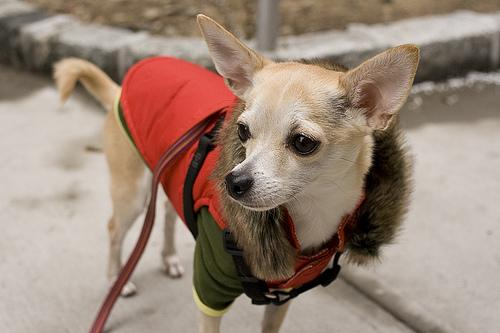

In [ ]:
from IPython.display import Image
Image(Path("Images", train_file_list[2])) # access through index no ex: 1,2,3

### Exploring the Images folder

We've explored the `Annotations` folder, now let's check out our `Images` folder.

We know that the image file names come in the format `class_name/image_name`, for example, `n02085620-Chihuahua/n02085620_5927.jpg`.

To make things a little simpler, let's create the following:

1. A mapping from folder name -> class name in dictionary form, for example, `{'n02113712-miniature_poodle': 'miniature_poodle',
 'n02092339-Weimaraner': 'weimaraner',
 'n02093991-Irish_terrier': 'irish_terrier'...}`. This will help us when visualizing our data from its original folder.
2. A list of all unique dog class names with simple formatting, for example, `['affenpinscher',
 'afghan_hound',
 'african_hunting_dog',
 'airedale',
 'american_staffordshire_terrier'...]`.

 Let's start by getting a list of all the folders in the `Images` directory with `os.listdir()`.

In [ ]:
# Get a list of all image folders
image_folders = os.listdir("Images")
image_folders[:10]

['n02086079-Pekinese',
 'n02088364-beagle',
 'n02106166-Border_collie',
 'n02097209-standard_schnauzer',
 'n02104365-schipperke',
 'n02098413-Lhasa',
 'n02110627-affenpinscher',
 'n02108915-French_bulldog',
 'n02093428-American_Staffordshire_terrier',
 'n02099712-Labrador_retriever']

Excellent!

Now let's make a dictionary which maps from the folder name to a simplified version of the class name, for example:

```
{'n02085782-Japanese_spaniel': 'japanese_spaniel',
'n02106662-German_shepherd': 'german_shepherd',
'n02093256-Staffordshire_bullterrier': 'staffordshire_bullterrier',
...}
```


In [ ]:
# Create folder name -> class name dict
folder_to_class_name_dict = {}
for folder_name in image_folders:
  # Turn folder name into class_name
  # E.g. "n02089078-black-and-tan_coonhound" -> "black_and_tan_coonhound"
  # We'll split on the first "-" and join the rest of the string with "_" and then lower it
  class_name = "_".join(folder_name.split("-")[1:]).lower()
  folder_to_class_name_dict[folder_name] = class_name

# Make sure there are 120 entries in the dictionary
assert len(folder_to_class_name_dict) == 120

Folder name to class name mapping created, let's view the first 10.

In [ ]:
list(folder_to_class_name_dict.items())[:10]

[('n02086079-Pekinese', 'pekinese'),
 ('n02088364-beagle', 'beagle'),
 ('n02106166-Border_collie', 'border_collie'),
 ('n02097209-standard_schnauzer', 'standard_schnauzer'),
 ('n02104365-schipperke', 'schipperke'),
 ('n02098413-Lhasa', 'lhasa'),
 ('n02110627-affenpinscher', 'affenpinscher'),
 ('n02108915-French_bulldog', 'french_bulldog'),
 ('n02093428-American_Staffordshire_terrier',
  'american_staffordshire_terrier'),
 ('n02099712-Labrador_retriever', 'labrador_retriever')]

And we can get a list of unique dog names by getting the `values()` of the `folder_to_class_name_dict` and turning it into a list.

In [ ]:
dog_names = sorted(list(folder_to_class_name_dict.values()))
dog_names[:10]

['affenpinscher',
 'afghan_hound',
 'african_hunting_dog',
 'airedale',
 'american_staffordshire_terrier',
 'appenzeller',
 'australian_terrier',
 'basenji',
 'basset',
 'beagle']

Perfect!

Now we've got:

1. `folder_to_class_name_dict` - a mapping from the folder name to the class name.
2. `dog_names` - a list of all the unique dog breeds we're working with.

### Visualize a group of random images

How about we follow the data explorers motto of *visualize, visualize, visualize* and view some random images?

To help us visualize, let's create a function that takes in a list of image paths and then randomly selects 10 of those paths to display.

The function will:
1. Take in a select list of image paths.
2. Create a grid of matplotlib plots (e.g. 2x5 = 10 plots to plot on).
3. Randomly sample 10 image paths from the input image path list (using `random.sample()`).
4. Iterate through the flattened axes via `axes.flat` which is a reference to the attribute [`numpy.ndarray.flat`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flat.html).
5. Extract the sample path from the list of samples.
6. Get the sample title from the parent folder of the path using [`Path.parent.stem`](https://docs.python.org/3/library/pathlib.html#pathlib.PurePath.parent) and then extract the formatted dog breed name by indexing `folder_to_class_name_dict`.
7. Read the image with [`plt.imread()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imread.html) and show it on the target `ax` with [`ax.imshow()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html).
8. Set the title of the plot to the parent folder name with [`ax.set_title()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html) and turn the axis marks of with [`ax.axis("off")`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axis.html) (this makes for pretty plots).
9. Show the plot with `plt.show()`.

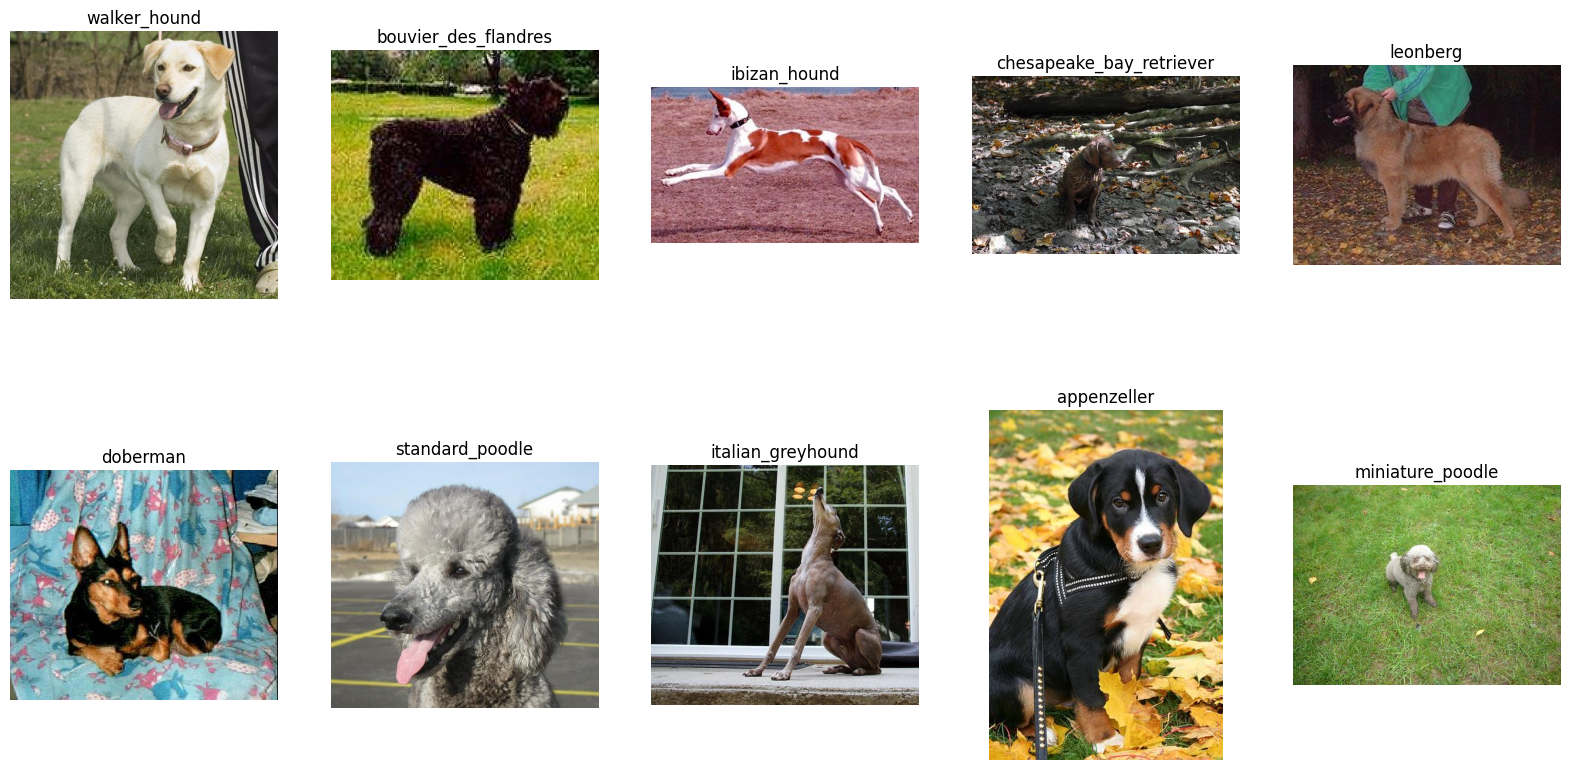

In [ ]:
import random

from pathlib import Path
from typing import List

import matplotlib.pyplot as plt

# 1. Take in a select list of image paths
def plot_10_random_images_from_path_list(path_list: List[Path],
                                         extract_title: bool=True) -> None:
  # 2. Set up a grid of plots
  fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))

  # 3. Randomly sample 10 paths from the list
  samples = random.sample(path_list, 10)

  # 4. Iterate through the flattened axes and corresponding sample paths
  for i, ax in enumerate(axes.flat):

    # 5. Get the target sample path (e.g. "Images/n02087394-Rhodesian_ridgeback/n02087394_1161.jpg")
    sample_path = samples[i]

    # 6. Extract the parent directory name to use as the title (if necessary)
    # (e.g. n02087394-Rhodesian_ridgeback/n02087394_1161.jpg -> n02087394-Rhodesian_ridgeback -> rhodesian_ridgeback)
    if extract_title:
      sample_title = folder_to_class_name_dict[sample_path.parent.stem]
    else:
      sample_title = sample_path.parent.stem

    # 7. Read the image file and plot it on the corresponding axis
    ax.imshow(plt.imread(sample_path))

    # 8. Set the title of the axis and turn of the axis (for pretty plots)
    ax.set_title(sample_title)
    ax.axis("off")

  # 9. Display the plot
  plt.show()

plot_10_random_images_from_path_list(path_list=[Path("Images") / Path(file) for file in train_file_list])

Those are some nice looking dogs!

What I like to do here is rerun the random visualizations until I've seen 100+ samples so I've got an idea of the data we're working with.

> **Question:** Here's something to think about, how would you code a system of rules to differentiate between all the different breeds of dogs? Perhaps you write an algorithm to look at the shapes or the colours? For example, if the dog had black fur, it's unlikely to be a golden retriever. You might be thinking "that would take quite a long time..." And you'd be right. Then how would we do it? With machine learning of course!

### Exploring the distribution of our data

After visualization, another valuable way to explore the data is by checking the data distribution.

Distribution refers to the "spread" of data.

In our case, how many images of dogs do we have per breed?

A balanced distribution would mean having roughly the same number of images for each breed (e.g. 100 images per dog breed).

> **Note:** There's a deeper level of distribution than just images per dog breed. Ideally, the images for each different breed are well distributed as well. For example, we wouldn't want to have 100 of the same image per dog breed. Not only would we like a similar number of images per breed, we'd like the images of each particular breed to be in different scenarios, different lighting, different angles. We want this because we want to our model to be able to recognize the correct dog breed no matter what angle the photo is taken from.

To figure out how many images we have per class, let's write a function count the number of images per subfolder in a given directory.

Specifically, we'll want the function to:
1. Take in a target directory/folder.
2. Create a list of all the subdirectories/subfolders in the target folder.
3. Create an empty list, `image_class_counts` to append subfolders and their counts to.
4. Iterate through all of the subdirectories.
5. Get the class name of the target folder as the name of the folder.
6. Count the number of images in the target folder using the length of the list of image paths (we can get these with [`Path().rglob(*.jpg)`](https://docs.python.org/3/library/pathlib.html#pathlib.Path.rglob) where `*.jpg` means "all files with the extension `.jpg`.
7. Append a dictionary of `{"class_name": class_name, "image_count": image_count}` to the `image_class_counts` list (we create a list of dictionaries so we can turn this into a pandas DataFrame).
8. Return the `image_class_counts` list.

In [ ]:
# Create a dictionary of image counts
from pathlib import Path
from typing import List, Dict

# 1. Take in a target directory
def count_images_in_subdirs(target_directory: str) -> List[Dict[str, int]]:
    """
    Counts the number of JPEG images in each subdirectory of the given directory.

    Each subdirectory is assumed to represent a class, and the function counts
    the number of '.jpg' files within each one. The result is a list of
    dictionaries with the class name and corresponding image count.

    Args:
        target_directory (str): The path to the directory containing subdirectories.

    Returns:
        List[Dict[str, int]]: A list of dictionaries with 'class_name' and 'image_count' for each subdirectory.

    Examples:
        >>> count_images_in_subdirs('/path/to/directory')
        [{'class_name': 'beagle', 'image_count': 50}, {'class_name': 'poodle', 'image_count': 60}]
    """
    # 2. Create a list of all the subdirectoires in the target directory (these contain our images)
    images_dir = Path(target_directory)
    image_class_dirs = [directory for directory in images_dir.iterdir() if directory.is_dir()]

    # 3. Create an empty list to append image counts to
    image_class_counts = []

    # 4. Iterate through all of the subdirectories
    for image_class_dir in image_class_dirs:

        # 5. Get the class name from image directory (e.g. "Images/n02116738-African_hunting_dog" -> "n02116738-African_hunting_dog")
        class_name = image_class_dir.stem

        # 6. Count the number of images in the target subdirectory
        image_count = len(list(image_class_dir.rglob("*.jpg")))  # get length all files with .jpg file extension

        # 7. Append a dictionary of class name and image count to count list
        image_class_counts.append({"class_name": class_name,
                                   "image_count": image_count})

    # 8. Return the list
    return image_class_counts

Let's run it on our target directory `Images` and view the first few indexes.

In [ ]:
image_class_counts = count_images_in_subdirs("Images")
image_class_counts[:3]

[{'class_name': 'n02086079-Pekinese', 'image_count': 149},
 {'class_name': 'n02088364-beagle', 'image_count': 195},
 {'class_name': 'n02106166-Border_collie', 'image_count': 150}]

Nice!

Since our `image_class_counts` variable is the form of a list of dictionaries, we can turn it into a pandas `DataFrame`.

Let's sort the `DataFrame` by `"image_count"` so the classes with the most images appear at the top, we can do so with [`DataFrame.sort_values()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html).

In [ ]:
# Create a DataFrame
import pandas as pd
image_counts_df = pd.DataFrame(image_class_counts).sort_values(by="image_count", ascending=False)
image_counts_df.head()

class_name  image_count
53           n02085936-Maltese_dog          252
64          n02088094-Afghan_hound          239
34    n02092002-Scottish_deerhound          232
13            n02112018-Pomeranian          219
19  n02107683-Bernese_mountain_dog          218

And let's cleanup the `"class_name"` column to be more readable by mapping the the values to our `folder_to_class_name_dict`.

In [ ]:
# Make class name column easier to read
image_counts_df["class_name"] = image_counts_df["class_name"].map(folder_to_class_name_dict)
image_counts_df.head()

class_name  image_count
53           maltese_dog          252
64          afghan_hound          239
34    scottish_deerhound          232
13            pomeranian          219
19  bernese_mountain_dog          218

Now we've got a `DataFrame` of image counts per class, we can make them more visual by turning them into a plot.

To do so, we can use `image_counts_df.plot(kind="bar", ...)` along with some other customization.

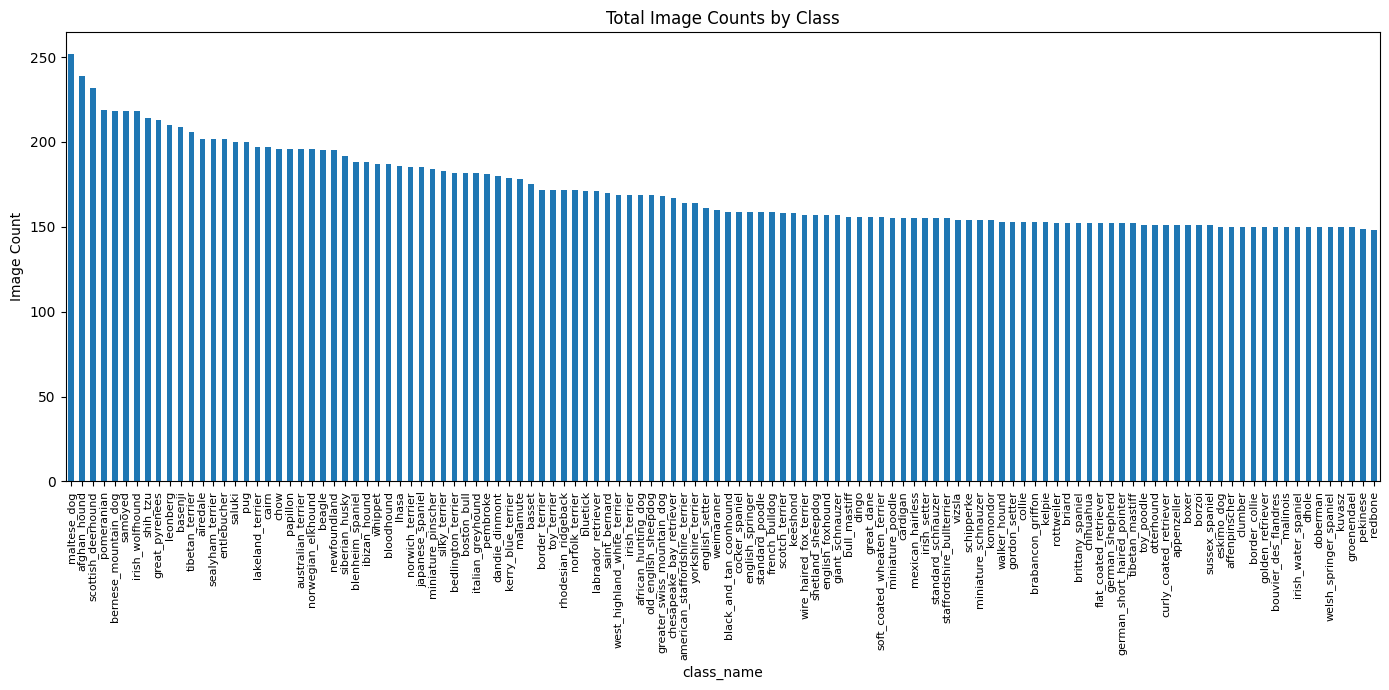

In [ ]:
# Turn the image counts DataFrame into a graph
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))
image_counts_df.plot(kind="bar",
                     x="class_name",
                     y="image_count",
                     legend=False,
                     ax=plt.gca()) # plt.gca() = "get current axis", get the plt we setup above and put the data there

# Add customization
plt.ylabel("Image Count")
plt.title("Total Image Counts by Class")
plt.xticks(rotation=90, # Rotate the x labels for better visibility
           fontsize=8) # Make the font size smaller for easier reading
plt.tight_layout() # Ensure things fit nicely
plt.show()

Beautiful! It looks like our classes are quite balanced. Each breed of dog has ~150 or more images.

We can find out some other quick stats about our data with [`DataFrame.describe()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html).

In [ ]:
# Get various statistics about our data distribution
image_counts_df.describe()

image_count
count   120.000000
mean    171.500000
std      23.220898
min     148.000000
25%     152.750000
50%     159.500000
75%     186.250000
max     252.000000

And the table shows a similar story to the plot. We can see the minimum number of images per class is 148, where as the maximum number of images is 252.

If one class had 10x less images than another class, we may look into collecting more data to improve the balance.

The main takeaway(s):
* When working on a classification problem, ideally, all classes have a similar number of samples (however, in some problems this may be unattainable, such as fraud detection, where you may have 1000x more "not fraud" samples to "fraud" samples.
* If you wanted to add a new class of dog breed to the existing 120, ideally, you'd have at least ~150 images for it (though as we'll see with transfer learning, the number of required images could be less as long as they're high quality).

## 4. Creating training and test data split directories

After exploring the data, one of the next best things you can do is create experimental data splits.

This includes:

| Set Name | Description | Typical Percentage of Data |
|:-----|:-----|:-----|
| Training Set | A dataset for the model to learn on | 70-80% |
| Testing Set              | A dataset for the model to be evaluated on           | 20-30%                    |
| (Optional) Validation Set | A dataset to tune the model on                       | 50% of the test data      |
| (Optional) Smaller Training Set | A smaller size dataset to run quick experiments on | 5-20% of the training set |

Our dog dataset already comes with specified training and test set splits.

So we'll stick with those.

But we'll also create a smaller training set (a random 10% of the training data) so we can stick to the machine learning engineers motto of *experiment, experiment, experiment!* and run quicker experiments.

> **Note:** One of the most important things in machine learning is being able to experiment quickly. As in, try a new model, try a new set of hyperparameters or try a new training setup. When you start out, you want the time between your experiments to be as small as possible so you can quickly figure out what *doesn't work* so you can spend more time on and run larger experiments with what *does* work.

As previously discussed, we're working towards a directory structure of:

```
images_split/
├── train/
│   ├── class_1/
│   │   ├── train_image1.jpg
│   │   ├── train_image2.jpg
│   │   └── ...
│   ├── class_2/
│   │   ├── train_image1.jpg
│   │   ├── train_image2.jpg
│   │   └── ...
└── test/
    ├── class_1/
    │   ├── test_image1.jpg
    │   ├── test_image2.jpg
    │   └── ...
    ├── class_2/
    │   ├── test_image1.jpg
    │   ├── test_image2.jpg
...
```

So let's write some code to create:
* `images/train/` directory to hold all of the training images.
* `images/test/` directory to hold all of the testing images.
* Make a directory inside each of `images/train/` and `images/test/` for each of the dog breed classes.

We can make each of the directories we need using [`Path.mkdir()`](https://docs.python.org/3/library/pathlib.html#pathlib.Path.mkdir).

For the dog breed directories, we'll loop through the list of `dog_names` and create a folder for each inside the `images/train/` and `images/test/` directories.


In [ ]:
from pathlib import Path

# Define the target directory for image splits to go
images_split_dir = Path("images_split")

# Define the training and test directories
train_dir = images_split_dir / "train"
test_dir = images_split_dir / "test"

# Using Path.mkdir with exist_ok=True ensures the directory is created only if it doesn't exist
train_dir.mkdir(parents=True, exist_ok=True)
test_dir.mkdir(parents=True, exist_ok=True)
print(f"Directory {train_dir} is exists.")
print(f"Directory {test_dir} is exists.")

# Make a folder for each dog name
for dog_name in dog_names:
  # Make training dir folder
  train_class_dir = train_dir / dog_name
  train_class_dir.mkdir(parents=True, exist_ok=True)
  # print(f"Making directory: {train_class_dir}")

  # Make testing dir folder
  test_class_dir = test_dir / dog_name
  test_class_dir.mkdir(parents=True, exist_ok=True)
  # print(f"Making directory: {test_class_dir}")

# Make sure there is 120 subfolders in each
assert count_subfolders(train_dir) == len(dog_names)
assert count_subfolders(test_dir) == len(dog_names)

Directory images_split/train is exists.
Directory images_split/test is exists.


Excellent!

We can check out the data split directories/folders we created by inspecting them in the files panel in Google Colab.

Alternatively, we can check the names of each by list the subdirectories inside them.

In [ ]:
# See the first 10 directories in the training split dir
sorted([str(dir_name) for dir_name in train_dir.iterdir() if dir_name.is_dir()])[:10]

['images_split/train/affenpinscher',
 'images_split/train/afghan_hound',
 'images_split/train/african_hunting_dog',
 'images_split/train/airedale',
 'images_split/train/american_staffordshire_terrier',
 'images_split/train/appenzeller',
 'images_split/train/australian_terrier',
 'images_split/train/basenji',
 'images_split/train/basset',
 'images_split/train/beagle']

You might've noticed that all of our dog breed directories are empty.

Let's change that by getting some images in there.

To do so, we'll create a function called `copy_files_to_target_dir()` which will copy images from the `Images` directory into their respective directories inside `images/train` and `images/test`.

More specifically, it will:
1. Take in a list of source files to copy (e.g. `train_file_list`) and a target directory to copy files to.
2. Iterate through the list of sources files to copy (we'll use [`tqdm`](https://github.com/tqdm/tqdm) which comes installed with Google Colab to create a progress bar of how many files have been copied).
3. Convert the source file path to a `Path` object.
4. Split the source file path and create a `Path` object for the destination folder (e.g. "n02112018-Pomeranian" -> "pomeranian").
5. Get the target file name (e.g. "n02112018-Pomeranian/n02112018_6208.jpg" -> "n02112018_6208.jpg").
5. Create a destination path for the source file to be copied to (e.g. `images_split/train/pomeranian/n02112018_6208.jpg`).
6. Ensure the destination directory exists, similar to the step we took in the previous section (you can't copy files to a directory that doesn't exist).
7. Print out the progress of copying (if necessary).
8. Copy the source file to the destination using Python's [`shutil.copy2(src, dst)`](https://docs.python.org/3/library/shutil.html#shutil.copy2).

In [ ]:
from pathlib import Path
from shutil import copy2
from tqdm.auto import tqdm

# 1. Take in a list of source files to copy and a target directory
def copy_files_to_target_dir(file_list: list[str],
                             target_dir: str,
                             images_dir: str = "Images",
                             verbose: bool = False) -> None:
    """
    Copies a list of files from the images directory to a target directory.

    Parameters:
    file_list (list[str]): A list of file paths to copy.
    target_dir (str): The destination directory path where files will be copied.
    images_dir (str, optional): The directory path where the images are currently stored. Defaults to 'Images'.
    verbose (bool, optional): If set to True, the function will print out the file paths as they are being copied. Defaults to False.

    Returns:
    None
    """
    # 2. Iterate through source files
    for file in tqdm(file_list):

      # 3. Convert file path to a Path object
      source_file_path = Path(images_dir) / Path(file)

      # 4. Split the file path and create a Path object for the destination folder
      # e.g. "n02112018-Pomeranian" -> "pomeranian"
      file_class_name = folder_to_class_name_dict[Path(file).parts[0]]

      # 5. Get the name of the target image
      file_image_name = Path(file).name

      # 6. Create the destination path
      destination_file_path = Path(target_dir) / file_class_name / file_image_name

      # 7. Ensure the destination directory exists (this is a safety check, can't copy an image to a file that doesn't exist)
      destination_file_path.parent.mkdir(parents=True, exist_ok=True)

      # 8. Print out copy message if necessary
      if verbose:
        print(f"[INFO] Copying: {source_file_path} to {destination_file_path}")

      # 9. Copy the original path to the destination path
      copy2(src=source_file_path, dst=destination_file_path)

Copying function created!

Let's test it out by copying the files in the `train_file_list` to `train_dir`.

In [ ]:
# Copy training images from Images to images_split/train/...
copy_files_to_target_dir(file_list=train_file_list,
                         target_dir=train_dir,
                         verbose=False) # set this to True to get an output of the copy process
                                        # (warning: this will output a large amount of text)

  0%|          | 0/12000 [00:00<?, ?it/s]

Looks like our copying function copied 12000 training images in their respective directories inside `images_split/train/`.

How about we do the same for `test_file_list` and `test_dir`?

In [ ]:
copy_files_to_target_dir(file_list=test_file_list,
                         target_dir=test_dir,
                         verbose=False)

  0%|          | 0/8580 [00:00<?, ?it/s]

Nice! 8580 testing images copied from `Images` to `images_split/test/`.

Let's write some code to check that the number of files in the `train_file_list` is the same as the number of images files in `train_dir` (and the same for the test files).

In [ ]:
# Get list of of all .jpg paths in train and test image directories
train_image_paths = list(train_dir.rglob("*.jpg"))
test_image_paths = list(test_dir.rglob("*.jpg"))

# Make sure the number of images in the training and test directories equals the number of files in their original lists
assert len(train_image_paths) == len(train_file_list)
assert len(test_image_paths) == len(test_file_list)

print(f"Number of images in {train_dir}: {len(train_image_paths)}")
print(f"Number of images in {test_dir}: {len(test_image_paths)}")

Number of images in images_split/train: 12000
Number of images in images_split/test: 8580


Let's plot some random images from the `train_image_paths` list.

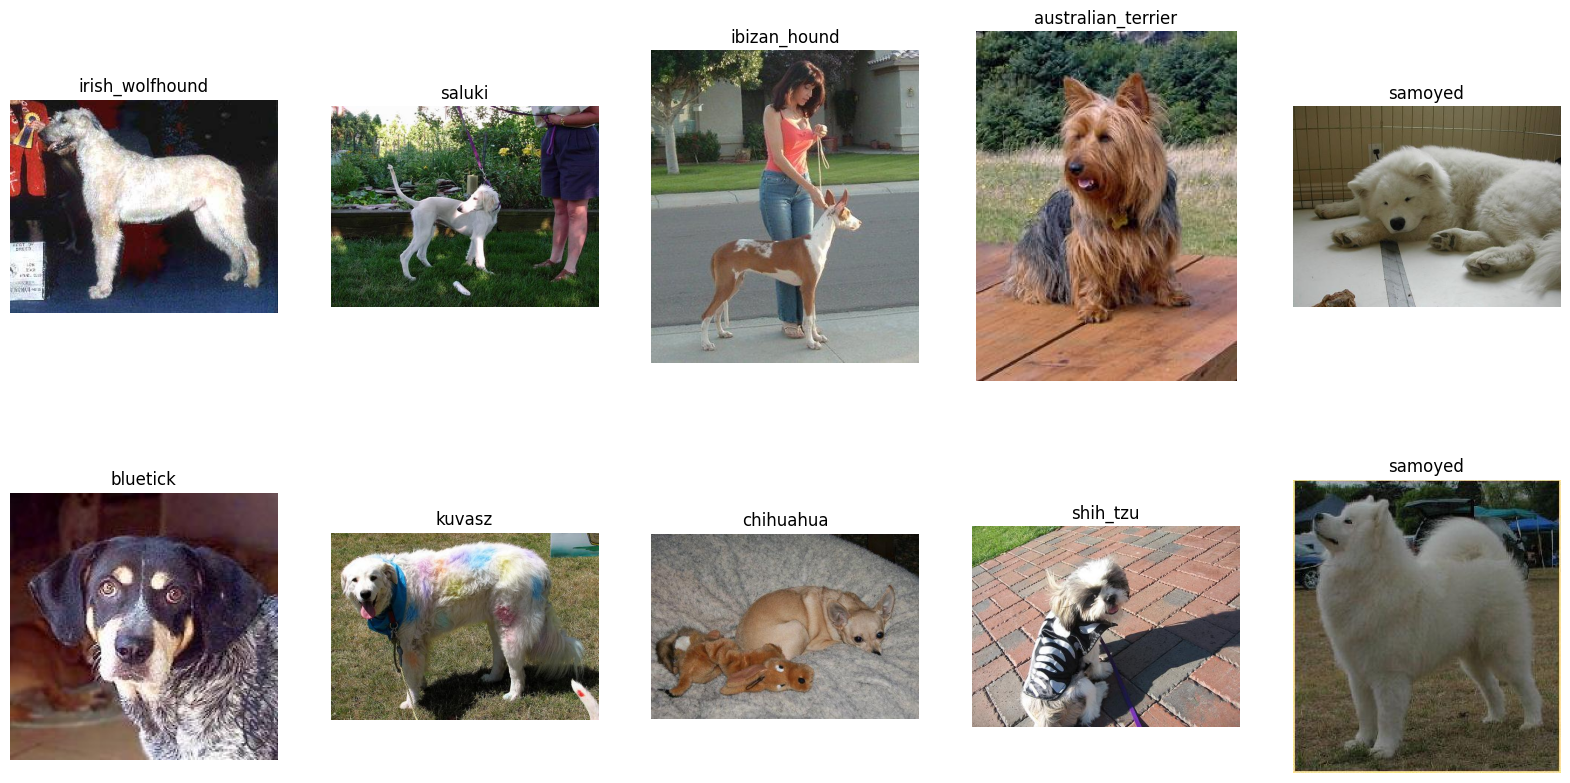

In [ ]:
# Plot 10 random images from the train_image_paths
plot_10_random_images_from_path_list(path_list=train_image_paths,
                                     extract_title=False) # don't need to extract the title since the image directories are already named simply

### Making a 10% training dataset split

We've already split the data into training and test sets, so why might we want to make another split?

Well, remember the machine learners motto?

*Experiment, experiment, experiment!*

We're going to make another training split which contains a random 10% (approximately 1,200 images, since the original training set has 12,000 images) of the data from the original training split.

Why?

Because whilst machine learning models generally perform better with more data, having more data means longer computation times.

And longer computation times means the time between our experiments gets longer.

Which is not what we want in the beginning.

In the beginning of any new machine learning project, your focus should be to **reduce the amount of time between experiments as much as possible**.

Why?

Because running more experiments means you can figure out what doesn't work.

And if you figure out what doesn't work, you can start working closer towards what does.

Once you find something that does work, you can start to scale up your experiments (more data, bigger models, longer training times - we'll see these later on).

To make our 10% training dataset, let's copy a random 10% of the existing training set to a new folder called `images_split/train_10_percent`, so we've got the layout:

```
images_split/
├── train/
│   ├── class_1/
│   │   ├── train_image1.jpg
│   │   ├── train_image2.jpg
│   │   └── ...
│   ├── class_2/
│   │   ├── train_image1.jpg
│   │   ├── train_image2.jpg
│   │   └── ...
├── train_10_percent/ <--- NEW!
│   ├── class_1/
│   │   ├── random_train_image42.jpg
│   │   └── ...
│   ├── class_2/
│   │   ├── random_train_image106.jpg
│   │   └── ...
└── test/
    ├── class_1/
    │   ├── test_image1.jpg
    │   ├── test_image2.jpg
    │   └── ...
    ├── class_2/
    │   ├── test_image1.jpg
    │   ├── test_image2.jpg
    │   └── ...
```

Let's start by creating that folder.


In [ ]:
# Create train_10_percent directory
train_10_percent_dir = images_split_dir / "train_10_percent"
train_10_percent_dir.mkdir(parents=True, exist_ok=True)

Now we should have 3 split folders inside `images_split`.

In [ ]:
os.listdir(images_split_dir)

['train_10_percent', 'train', 'test']

Beautiful!

Now let's create a list of random training sample filepaths using Python's [`random.sample()`](https://docs.python.org/3/library/random.html#random.sample), we'll want the total length of the list to equal 10% of the original training split.

To make things reproducible, we'll use a random seed (this is not 100% necessary, it just makes it so we get the same 10% of training image paths each time).

In [ ]:
import random

# Set a random seed
random.seed(42)

# Get a 10% sample of the training image paths
train_image_paths_random_10_percent = random.sample(population=train_image_paths,
                                                    k=int(0.1*len(train_image_paths)))

# Check how many image paths we got
print(f"Original number of training image paths: {len(train_image_paths)}")
print(f"Number of 10% training image paths: {len(train_image_paths_random_10_percent)}")
print("First 5 random 10% training image paths:")
train_image_paths_random_10_percent[:5]

Original number of training image paths: 12000
Number of 10% training image paths: 1200
First 5 random 10% training image paths:


[PosixPath('images_split/train/papillon/n02086910_4210.jpg'),
 PosixPath('images_split/train/bouvier_des_flandres/n02106382_2195.jpg'),
 PosixPath('images_split/train/soft_coated_wheaten_terrier/n02098105_1355.jpg'),
 PosixPath('images_split/train/tibetan_mastiff/n02108551_3980.jpg'),
 PosixPath('images_split/train/lhasa/n02098413_178.jpg')]

Random 10% training image paths acquired!

Let's copy them to the `images_split/train_10_percent` directory using similar code to our `copy_files_to_target_dir()` function.

In [ ]:
# Copy training 10% split images from images_split/train/ to images_split/train_10_percent/...
for source_file_path in tqdm(train_image_paths_random_10_percent):

  # Create the destination file path
  destination_file_and_image_name = Path(*source_file_path.parts[-2:]) # "images_split/train/yorkshire_terrier/n02094433_2223.jpg" -> "yorkshire_terrier/n02094433_2223.jpg"
  destination_file_path = train_10_percent_dir / destination_file_and_image_name # "yorkshire_terrier/n02094433_2223.jpg" -> "images_split/train_10_percent/yorkshire_terrier/n02094433_2223.jpg"

  # If the target directory doesn't exist, make it
  target_class_dir = destination_file_path.parent
  if not target_class_dir.is_dir():
    # print(f"Making directory: {target_class_dir}")
    target_class_dir.mkdir(parents=True,
                           exist_ok=True)

  # print(f"Copying: {source_file_path} to {destination_file_path}")
  copy2(src=source_file_path,
        dst=destination_file_path)

  0%|          | 0/1200 [00:00<?, ?it/s]

1200 images copied!

Let's check our training 10% set distribution and make sure we've got some images for each class.

We can use our `count_images_in_subdirs()` function to count the images in each of the dog breed folders in the `train_10_percent_dir`.

In [ ]:
# Count images in train_10_percent_dir
train_10_percent_image_class_counts = count_images_in_subdirs(train_10_percent_dir)
train_10_percent_image_class_counts_df = pd.DataFrame(train_10_percent_image_class_counts).sort_values("image_count", ascending=True)
train_10_percent_image_class_counts_df.head()

class_name  image_count
33   lakeland_terrier            3
64    german_shepherd            4
23    tibetan_terrier            4
61           keeshond            4
58  brabancon_griffon            5

Okay, looks like a few classes have only a handful of images.

Let's make sure there's 120 subfolders by checking the length of the `train_10_percent_image_class_counts_df`.

In [ ]:
# How many subfolders are there?
print(len(train_10_percent_image_class_counts_df))

120


Beautiful, our train 10% dataset split has a folder for each of the dog breed classes.

> **Note:** Ideally our random 10% training set would have the same distribution per class as the original training set, however, for this example, we've taken a global random 10% rather than a random 10% *per class*. This is okay for now, however for more fine-grained tasks, you may want to make sure your smaller training set is better distributed.

For one last check, let's plot the distribution of our train 10% dataset.

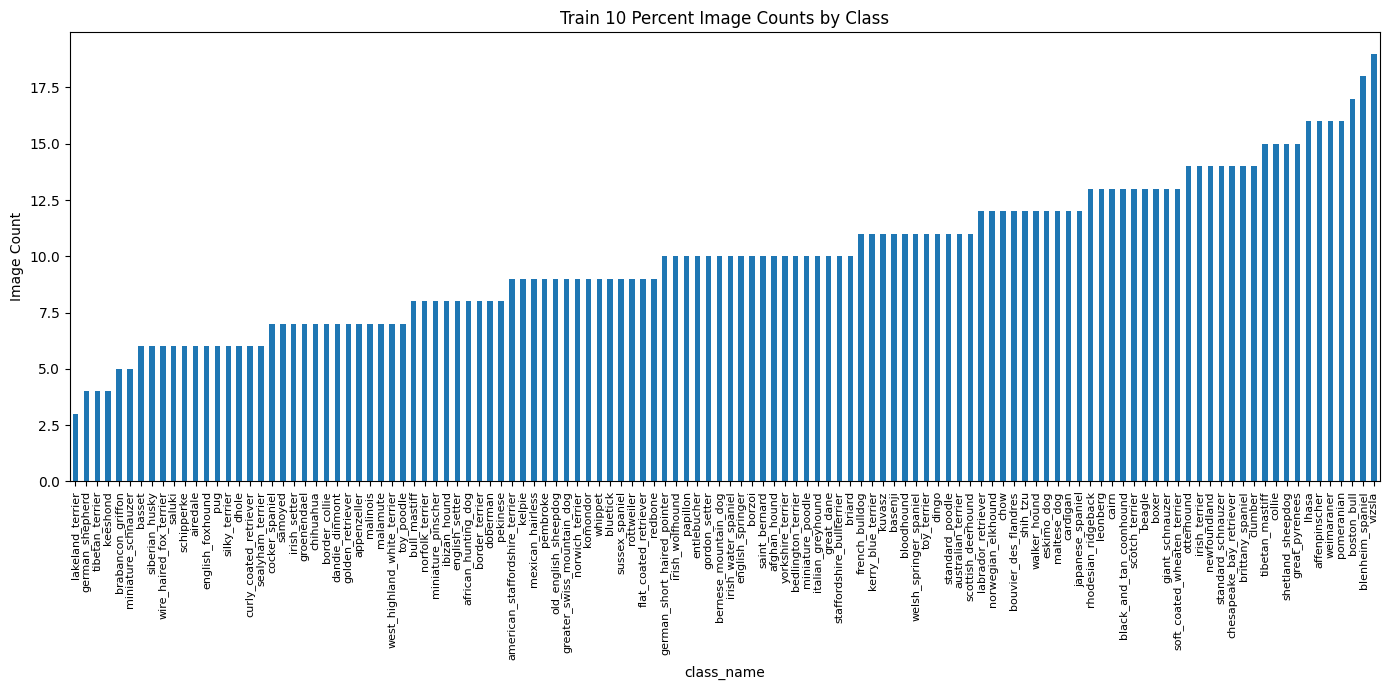

In [ ]:
# Plot distribution of train 10% dataset.
plt.figure(figsize=(14, 7))
train_10_percent_image_class_counts_df.plot(kind="bar",
                     x="class_name",
                     y="image_count",
                     legend=False,
                     ax=plt.gca()) # plt.gca() = "get current axis", get the plt we setup above and put the data there

# Add customization
plt.title("Train 10 Percent Image Counts by Class")
plt.ylabel("Image Count")
plt.xticks(rotation=90, # Rotate the x labels for better visibility
           fontsize=8) # Make the font size smaller for easier reading
plt.tight_layout() # Ensure things fit nicely
plt.show()

Excellent! Our train 10% dataset distribution looks similar to the original training set distribution.

However, it could be better.

If we really wanted to, we could recreate the train 10% dataset with 10% of the images from *each class* rather than 10% of images globally.

> **Extension:** How would you create the `train_10_percent` data split with 10% of the images from each class? For example, each folder would have at least 10 images of a particular dog breed.

## 5. Turning datasets into TensorFlow Dataset(s)

Alright, we've spent a bunch of time getting our dog images into different folders.

But how do we get the images from different folders into a machine learning model?

Well, like the other machine learning models we've built throughout the course, we need a way to turn our images into numbers.

Specifically, we're going to turn our images into tensors.

That's where the "Tensor" comes from in "TensorFlow".

A [tensor](https://en.wikipedia.org/wiki/Tensor) is a way to numerically represent something (where something can be almost anything you can think of, text, images, audio, rows and columns).

There are several different ways to [load data into TensorFlow](https://www.tensorflow.org/tutorials/load_data/images).

But the formula is the same across data types, have data -> use TensorFlow to turn it into tensors.

The reason why we spent time getting our data into the standard image classification format (where the class name is the folder name) is because TensorFlow includes several utility functions to load data from this directory format.

| Function | Description |
| :----- | :----- |
| [`tf.keras.utils.image_dataset_from_directory()`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory) | Creates a [`tf.data.Dataset`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset) from image files in a directory. |
| [`tf.keras.utils.audio_dataset_from_directory()`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/audio_dataset_from_directory) | Creates a `tf.data.Dataset` from audio files in a directory. |
| [`tf.keras.utils.text_dataset_from_directory()`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/text_dataset_from_directory) | Creates a `tf.data.Dataset` from text files in a directory. |
| [`tf.keras.utils.timeseries_dataset_from_array()`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/timeseries_dataset_from_array) | Creates a dataset of sliding windows over a timeseries provided as array. |

What is a [`tf.data.Dataset`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset)?

It's TensorFlow's efficient way to store a potentially large set of elements.

As machine learning datasets can get quite large, you need an efficient way to store and load them.

This is what the `tf.data.Dataset` API provides.

And it's what we'd like to turn our dog images into.

Since we're working with images, we can do so with `tf.keras.utils.image_dataset_from_directory()`.

We'll pass in the following parameters:

* `directory` = the target directory we'd like to turn into a `tf.data.Dataset`.
* `label_mode` = the kind of labels we'd like to use, in our case it's `"categorical"` since we're dealing with a multi-class classification problem (we would use `"binary"` if we were working with binary classifcation problem).
* `batch_size` = the number of images we'd like our model to see at a time (due to computation limitations, our model won't be able to look at every image at once so we split them into small batches and the model looks at each batch individually), generally [32 is a good value to start](https://x.com/ylecun/status/989610208497360896?s=20), this means our model will look at 32 images at a time (this number is flexible).
* `image_size` = the size we'd like to shape our images to before we feed them to our model (height x width).
* `shuffle` = whether we'd like our dataset to be shuffled to randomize the order.
* `seed` = if we're shuffling the order in a random fashion, do we want that to be reproducible?

> **Note:** Values such as `batch_size` and `image_size` are known as **hyperparameters**, meaning they're values that you can decide what to set them as. As for the best value for a given hyperparameter, that depends highly on the data you're working with, problem space and compute capabilities you've got avaiable. Best to experiment!

With all this being said, let's see it in practice!

We'll make 3 `tf.data.Dataset`'s, `train_10_percent_ds`, `train_ds` and `test_ds`.

In [ ]:
import tensorflow as tf

# Create constants
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 42

# Create train 10% dataset
train_10_percent_ds = tf.keras.utils.image_dataset_from_directory(
    directory=train_10_percent_dir,
    label_mode="categorical", # turns labels into one-hot representations (e.g. [0, 0, 1, ..., 0, 0])
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    shuffle=True, # shuffle training datasets to prevent learning of order
    seed=SEED
)

# Create full train dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory=train_dir,
    label_mode="categorical",
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    shuffle=True,
    seed=SEED
)

# Create test dataset
test_ds = tf.keras.utils.image_dataset_from_directory(
    directory=test_dir,
    label_mode="categorical",
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    shuffle=False, # don't need to shuffle the test dataset (this makes evaluations easier)
    seed=SEED
)

Found 1200 files belonging to 120 classes.
Found 12000 files belonging to 120 classes.
Found 8580 files belonging to 120 classes.


> **Note:** If you're working with similar styles of data (e.g. all dog photos), it's best practice to **shuffle training datasets** to prevent the model from learning any order in the data, no need to shuffle testing datasets (this makes for easier evaluation).

`tf.data.Dataset`s created!

Let's check out one of them.

In [ ]:
train_10_percent_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.float32, name=None))>

You'll notice a few things going on here.

Essentially, we've got a collection of tuples:
1. The image tensor(s) - `TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)` where `(None, 224, 224, 3)` is the shape of the image tensor (`None` is the batch size, `(224, 224)` is the `IMG_SIZE` we set and `3` is the number of colour channels, as in, [red, green, blue or RGB](https://en.wikipedia.org/wiki/RGB_color_model) since our images are in colour).
2. The label tensor(s) - `TensorSpec(shape=(None, 120), dtype=tf.float32, name=None)` where `None` is the batch size and `120` is the number of labels we're using.

The batch size often appears as `None` since it's flexible and can change on the fly.

Each batch of images is assosciated with a batch of labels.

Instead of talking about it, let's check out what a single batch looks like.

We can do so by turning the `tf.data.Dataset` into an iterable with Python's built-in [`iter()`](https://docs.python.org/3/library/functions.html#iter) and then getting the "next" batch with [`next()`](https://docs.python.org/3/library/functions.html#next).

In [ ]:
# What does a single batch look like?
image_batch, label_batch = next(iter(train_ds))
image_batch.shape, label_batch.shape

(TensorShape([32, 224, 224, 3]), TensorShape([32, 120]))

Nice!

We get back a single batch of images and labels.

Looks like a single `image_batch` has a shape of `[32, 224, 224, 3]` (`[batch_size, height, width, colour_channels]`).

And our labels have a shape of `[32, 120]` (`[batch_size, labels]`).

These are numerical representations of our data images and labels!

> **Note:** The shape of a tensor does not necessarily reflect the values inside a tensor. The shape only reflects the dimensionality of a tensor. For example, `[32, 224, 224, 3]` is a 4-dimensional tensor. Values inside a tensor can be any number (positive, negative, 0, float, integer, etc) representing almost any kind of data.

We can further inspect our data by looking at a single sample.

In [ ]:
# Get a single sample from a single batch
print(f"Single image tensor:\n{image_batch[0]}\n")
print(f"Single label tensor: {label_batch[0]}") # notice the 1 is the index of the target label (our labels are one-hot encoded)
print(f"Single sample class name: {dog_names[tf.argmax(label_batch[0])]}")

Single image tensor:
[[[196.61607  174.61607  160.61607 ]
  [197.84822  175.84822  161.84822 ]
  [200.       178.       164.      ]
  ...
  [ 60.095097  79.75804   45.769207]
  [ 61.83293   71.22575   63.288315]
  [ 77.65755   83.65755   81.65755 ]]

 [[196.       174.       160.      ]
  [197.83876  175.83876  161.83876 ]
  [199.07945  177.07945  163.07945 ]
  ...
  [ 94.573715 110.55229   83.59694 ]
  [125.869865 135.26268  127.33472 ]
  [122.579605 128.5796   126.579605]]

 [[195.73691  173.73691  159.73691 ]
  [196.896    174.896    160.896   ]
  [199.       177.       163.      ]
  ...
  [ 26.679413  38.759026  20.500835]
  [ 24.372307  31.440136  26.675896]
  [ 20.214453  26.214453  24.214453]]

 ...

 [[ 61.57369   70.18976  104.72547 ]
  [189.91965  199.61607  213.28572 ]
  [247.26637  255.       252.70387 ]
  ...
  [113.40158   83.40158   57.40158 ]
  [110.75214   78.75214   53.752136]
  [107.37048   75.37048   50.370483]]

 [[ 61.27007   69.88614  104.42185 ]
  [188.93079  19

Woah!!

We've got a numerical representation of a dog image (in the form of red, green, blue pixel values)!

This is exactly the kind of format our model will want.

Can we do the reverse?

Instead of image -> numbers, can we go from numbers -> image?

### Visualizing images from our TensorFlow Dataset

Let's follow the data explorer's motto once again and *visualize, visualize, visualize!*

How about we turn our single sample from tensor format to image format?

We can do so by passing the single sample image tensor to matplotlib's [`plt.imshow()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) (we'll also need to convert its datatype from `float32` to `uint8` to avoid matplotlib colour range issues).

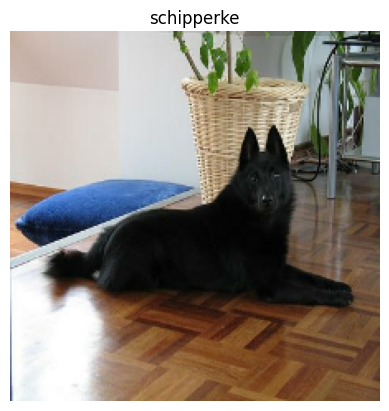

In [ ]:
plt.imshow(image_batch[0].numpy().astype("uint8")) # convert tensor to uint8 to avoid matplotlib colour range issues
plt.title(dog_names[tf.argmax(label_batch[0])])
plt.axis("off");

How about we plot multiple images?

We can do so by first setting up a plot with multiple subplots.

And then we can iterate through our dataset with [`tf.data.Dataset.take(count=1)`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#take) which will "take" `1` batch of data (in our case, one batch is 32 samples) which we can then index on for each subplot.

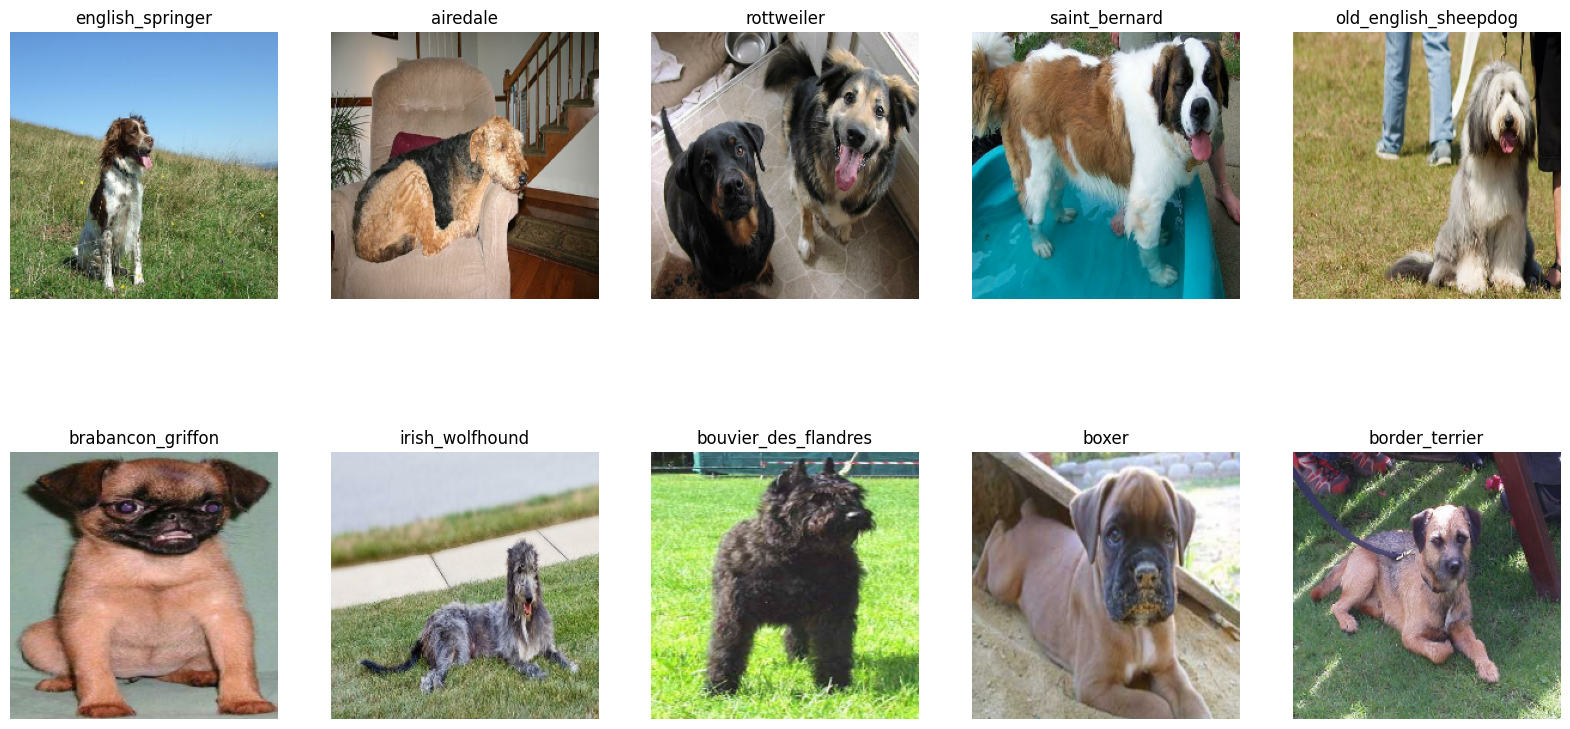

In [ ]:
# Create multiple subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))

# Iterate through a single batch and plot images
for images, labels in train_ds.take(count=1): # note: because our training data is shuffled, each "take" will be different
  for i, ax in enumerate(axes.flat):
    ax.imshow(images[i].numpy().astype("uint8"))
    ax.set_title(dog_names[tf.argmax(labels[i])])
    ax.axis("off")

### Getting labels from our TensorFlow Dataset

Since our data is now in `tf.data.Dataset` format, there are a couple of important attributes we can pull from it if necessary.

The first is the collection of filepaths asosciated with a `tf.data.Dataset`.

These are accessible by the `.file_paths` attribute.

> **Note:** You can often a see a list of assosciated methods and attributes of a variable/class in Google Colab (or other IDEs) by pressing TAB afterwards (e.g type `variable_name.` + TAB).

In [ ]:
# Get the first 5 file paths of the training dataset
train_ds.file_paths[:5]

['images_split/train/boston_bull/n02096585_1753.jpg',
 'images_split/train/kerry_blue_terrier/n02093859_855.jpg',
 'images_split/train/border_terrier/n02093754_2281.jpg',
 'images_split/train/rottweiler/n02106550_11823.jpg',
 'images_split/train/airedale/n02096051_5884.jpg']

We can also get the class names assosciated with a dataset using `.class_names` (TensorFlow has read these from the names of our target folders in the `images_split` directory).

In [ ]:
# Get the class names TensorFlow has read from the target directory
class_names = train_ds.class_names
class_names[:5]

['affenpinscher',
 'afghan_hound',
 'african_hunting_dog',
 'airedale',
 'american_staffordshire_terrier']

And we can make sure the class names are the same across our datasets by comparing them.

In [ ]:
assert set(train_10_percent_ds.class_names) == set(train_ds.class_names) == set(test_ds.class_names)

### Configuring our datasets for performance

There's one last step we're going to do before we build our first TensorFlow model.

And that's configure our datasets for performance.

More specifically, we're going to focus on following the TensorFlow guide for [*Better performance with the tf.data API*](https://www.tensorflow.org/guide/data_performance).

Why?

Because data loading is one of the biggest bottlenecks in machine learning.

Modern GPUs can perform calculations (matrix multiplications) to find patterns in data quite quickly.

However, for the GPU to perform such calculations, the data needs to be there.

Good news for us is that if we follow the [TensorFlow `tf.data` best practices](https://www.tensorflow.org/guide/data_performance#best_practice_summary), TensorFlow will take care of all these optimizations and hardware acceleration for us.

We're going to call three methods on our dataset to optimize it for performance:

* [`cache()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#cache) - Cache the elements in the dataset in memory or a target folder (speeds up loading.
* [`shuffle()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#shuffle) - Shuffle a set number of samples in preparation for loading (this will mean our samples *and* batches of samples will be shuffled), for example, setting `shuffle(buffer_size=1000)` will prepare and shuffle 1000 elements of data at a time.
* [`prefetch()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#prefetch) - Prefetch the next batch of data and prepare it for computation whilst the previous one is being computed on (can scale to multiple prefetches depending on hardware availability). TensorFlow can automatically configure how many elements/batches to prefetch by setting `prefetch(buffer_size=tf.data.AUTOTUNE)`.

> **Resource:** For more performance tips on loading dataset in TensorFlow, see the [Datasets Performance tips guide](https://www.tensorflow.org/datasets/performances).

In our case, let's start by calling `cache()` on our datasets to save the loaded samples to memory.

We'll then `shuffle()` the training splits with `buffer_size=10*BATCH_SIZE` for the training 10% split and `buffer_size=100*BATCH_SIZE` for the full training set.

Why these numbers?

That's how many I decided to use via experimentation, feel free to figure out a different number that may work better.

Ideally if your dataset isn't too large, you would shuffle all possible samples (TensorFlow has a method of finding the number of samples in a dataset called [`tf.data.Dataset.cardinality()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#cardinality)).

We won't call `shuffle()` on the testing dataset since it isn't required.

And we'll call `prefetch(buffer_size=tf.data.AUTOTUNE)` on each of our datasets to automatically load and prepare a number of data batches.


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE # let TensorFlow find the best values to use automatically

# Shuffle and optimize performance on training datasets
# Note: these methods can be chained together and will have the same effect as calling them individually
train_10_percent_ds = train_10_percent_ds.cache().shuffle(buffer_size=10*BATCH_SIZE).prefetch(buffer_size=AUTOTUNE)
train_ds = train_ds.cache().shuffle(buffer_size=100*BATCH_SIZE).prefetch(buffer_size=AUTOTUNE)

# Don't need to shuffle test datasets (for easier evaluation)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

Dataset performance optimized!

We spent some extra time here because datasets are so important to machine learning and deep learning workflows, wherever you can make them faster, you should.

Time to create our first neural network with TensorFlow!

## 6. Creating a neural network with TensorFlow

We've spent lots of time preparing the data.

This is because it's often the largest part of a machine learning problem, getting your data ready for a machine learning model.

Thanks to modern frameworks like TensorFlow, when you've got your data in order, building a deep learning model to find patterns in your data can be one of the easier steps of the process.

When you hear people talk about deep learning, they're often referring to neural networks.

Neural networks are one of the most flexible machine learning models there is.

You can create a neural network to fit almost any kind of data.

The "deep" in deep learning refers to the many layers that can be contained inside a neural network.

A neural network often follows the structure of:

Input layer -> Middle layer(s) -> Output layer.

<img src="https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/images/unstructured-data-anatomy-of-a-neural-network.png?raw=true" width=750 alt="This image illustrates a simple neural network diagram with one input layer, one hidden layer, and one output layer. The input layer has 2 neurons, the hidden layer has 3 neurons, and the output layer has 1 neuron. The diagram shows connections between neurons across layers. There are annotations indicating that the neural network can be customized for almost any kind of input and output, and although the number and type of hidden layers are infinitely customizable, there is often a practical upper limit. The output layer represents learned data or prediction probabilities. The overall theme conveys the flexibility and adaptability of neural network architectures."/>

*General anatomy of a neural network. Neural networks are almost infinitely customisable. The main premise is that data goes in one end, gets manipulated by many small functions in an attempt to learn patterns/weights which represent the data to produce useful outputs. Note that "patterns" is an arbitrary term, you’ll often hear "embedding", "weights", "feature representation", "representation" all referring to similar things.*

Where the input layer takes in the data, the middle layer(s) perform calculations on the data and (hopefully) learn patterns (also called weights/biases) to represent the data and the output layer performs a final transformation on the learned patterns to make them usable in human applications.

What goes into the middle layer(s)?

That's an excellent question.

Because there are so many different options.

But two of the most popular modern kinds of neural network are Convolutional Neural Networks (CNNs) and Transformers (the Transformer is the "T" in GPT, Generative Pretrained Transformer).

| Architecture  | Description | Example Layers | Problem Examples |
|:----- |:-----|:-----|:-----|
| [Transformer](https://en.wikipedia.org/wiki/Transformer_(machine_learning_model)) | A combination of fully connected layers as well as attention-based layers.                                       | [`tf.keras.layers.Attention`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Attention), [`tf.keras.layers.Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) | NLP, Machine Translation, Computer Vision  |
| [Convolutional Neural Network](https://en.wikipedia.org/wiki/Convolutional_neural_network) | A combination of fully connected layers as well as convolutional-based layers.                                   | [`tf.keras.layers.Conv2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D), [`tf.keras.layers.Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) | Computer Vision, Audio Processing |

Because our problem is in the computer space, we're going to use a CNN.

And instead of crafting our own CNN from scratch, we're going to take an existing CNN model and apply it to our own problem, harnessing the wonderful superpower of transfer learning.

> **Note:** You can build and use working neural networks with TensorFlow without knowing the intricate details that's going on the behind the scenes (that's what we're focused on). For an idea of the mathematical operations that make neural networks work, I'd recommend going through [3Blue1Brown's YouTube series on Neural Networks](https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi).



### The magic of transfer learning

**Transfer learning** is the process of getting an existing working model and adjusting it to your own problem.

This works particularly well for neural networks.

The main benefit of transfer learning is being able to get better results in less time with less data.

How?

An existing model may have the following features:

* Trained on lots of data (in the case of computer vision, existing models are often pretrained on ImageNet, a dataset of 1M+ images, this means they've already learned patterns across many different kinds of images).
* Crafted by expert researchers (large universities and companies such as Google and Meta often open-source their best models for others to try and use).
* Trained of lots of computing hardware (the larger the model and the larger the dataset, the more compute power you need, not everyone has access to 10s, 100s or 1000s of GPUs).
* Proven to perform well on a given task through several studies (this means it has a good chance on performing well on your task if it's similar).

You may be thinking, ok so, this all sounds incredible, where can I get pretrained models?

And the good news is, there are plenty of places to find pretrained models!

| Resource | Description |
| :--- | :--- |
| [`tf.keras.applications`](https://www.tensorflow.org/api_docs/python/tf/keras/applications) | A module built-in to TensorFlow and Keras with a series of pretrained models ready to use. |
| [KerasNLP](https://keras.io/keras_nlp/) and [KerasCV](https://keras.io/keras_cv/) | Two dedicated libraries for NLP (natural language processing) and CV (computer vision) each of which includes many modality-specific APIs and is capable of running with TensorFlow, JAX or PyTorch. |
| [Hugging Face Models Hub](https://huggingface.co/models) | A large collection of pretrained models on a wide range on tasks, from computer vision to natural language processing to audio processing. |
| [Kaggle Models](https://www.kaggle.com/models) | A huge collection of different pretrained models for many different tasks. |

<img src="https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/images/unstructured-data-places-to-find-pretrained-models.png?raw=true" width=750 alt="Four browser windows are open displaying web pages from Keras, TensorFlow, HuggingFace Hub, and Kaggle. Each window is showing documentation or listings related to machine learning models and applications. The sources are displayed prominently at the bottom of each window: keras.io for KerasCV and KerasNLP, tensorflow.org for tf.keras.applications, huggingface.co for HuggingFace Hub, and kaggle.com for Kaggle Models."/>

*Different locations to find pretrained models. This list is consistantly expanding as machine learning becomes more and more open-source.*

> **Note:** For most new machine learning problems, if you're looking to get good results quickly, you should generally look for a pretrained model similar to your problem and use transfer learning to adapt it to your own domain.

Since we're focused on TensorFlow/Keras, we're going to be using a pretrained model from `tf.keras.applications`.

More specifically, we're going to take the [`tf.keras.applications.efficientnet_v2.EfficientNetV2B0()`](https://www.tensorflow.org/api_docs/python/tf/keras/applications/efficientnet_v2/EfficientNetV2B0) model from the 2021 machine learning paper [*EfficientNetV2: Smaller Models and Faster Training*](https://arxiv.org/abs/2104.00298) from Google Research and apply it to our own problem.

This model has been trained on [ImageNet1k](https://en.wikipedia.org/wiki/ImageNet) (1M+ images across 1000 different diverse classes, there is a version called ImageNet22k with 14M+ images across 22,000 categories) so it has a good baseline understanding of patterns in images across a wide domain.

We'll see if we can adjust those patterns slightly to our dog images.

Let's create an instance of it and call it `base_model` (I'll explain why next).

In [ ]:
# Create the input shape to our model
INPUT_SHAPE = (*IMG_SIZE, 3)

base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(
    include_top=True, # do want to include the top layer? (ImageNet has 1000 classes, so the top layer is formulated for this, we want to create our own top layer)
    include_preprocessing=True, # do we want the network to preprocess our data into the right format for us? (yes)
    weights="imagenet", # do we want the network to come with pretrained weights? (yes)
    input_shape=INPUT_SHAPE # what is the input shape of our data we're going to pass to the network? (224, 224, 3) -> (height, width, colour_channels)
)

29403144/29403144 [==============================] - 0s 0us/step


Base model created!

We can find out information about our base model by calling `base_model.summary()`.

In [ ]:
# Note: Uncomment to see full output
# base_model.summary()

Truncated output of `base_model.summary()`:

<img src="https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/images/unstructured-data-effnetv2b0-model-summary.png?raw=true" width=750 alt="Screenshot of a text-based neural network model summary for 'efficientnetv2-b0'. The display lists layers, output shapes, parameter counts, and connectivity in a structured table with dashed lines separating columns. Visible layers include InputLayer, Rescaling, Normalization, Conv2D, BatchNormalization, Activation, GlobalAveragePooling2D, Dropout, and Dense, along with their corresponding specifications. A note indicates 90% of the layers are omitted for brevity."/>

Woah! Look at all those layers... this is what the "deep" in deep learning means! A *deep* number of layers.

How about we count the number of layers?

In [ ]:
# Count the number of layers
print(f"Number of layers in base_model: {len(base_model.layers)}")

Number of layers in base_model: 273


273 layers!

Wow, there's a lot going on.

Rather than step through each layer and explain what's happening in each layer, I'll leave that for the curious mind to research on their own.

Just know that when starting out deep learning you don't *need* to know what's happening every layer in a model to be able to use a model.

For now, let's pay attention to a few things:

* The **input layer** (the first layer) input shape, this will tell us the shape of the data the model expects as input.
* The **output layer** (the last layer) output shape, this will tell us the shape of the data the model will output.
* The **number of parameters** of the model, these are "learnable" numbers (also called weights) that a model will use to derive patterns out of and represent the data. Generally, the more parameters a model has, the more learning capacity it has.
* The **number of layers** a model has. Generally, the more layers a model has, the more learning capacity it has (each layer will learn progressively deeper patterns from the data). However, this caps out at a certain range.

Let's step through each of these.


### Model input and output shapes

One of the most important practical steps in using a deep learning model is input and output shapes.

Two questions to ask:

* What is the shape of my input data?
* What is the ideal shape of my output data?

We ask about shapes because in all deep learning models input and output data comes in the form of tensors.

This goes for text, audio, images and more.

The raw data gets converted to a numerical representation first before being passed to a model.

In our case, our input data has the shape of `[(32, 224, 224, 3)]` or `[(batch_size, height, width, colour_channels)]`.

And our ideal output shape will be `[(32, 120)]` or `[(batch_size, number_of_dog_classes)`.

Your input and output shapes will differ depending on the problem and data you're working with.

But as you get deeper into the world of machine learning (and deep learning), you'll find input and output shapes are one of the most common errors.

We can check our model's input and output shapes with the `.input_shape` and `.output_shape` attributes.


In [ ]:
# Check the input shape of our model
base_model.input_shape

(None, 224, 224, 3)

Nice! Looks like our model's input shape is where we want it (remember `None` in this case is equivalent to a wild card dimension, meaning it could be any value, but we've set ours to `32`).

This is because the model we chose, `tf.keras.applications.efficientnet_v2.EfficientNetV2B0`, has been trained on images the same size as our images.

If our model had a different input shape, we'd have to make sure we processed our images to be the same shape.

Now let's check the output shape.

In [ ]:
# Check the model's output shape
base_model.output_shape

(None, 1000)

Hmm, is this what we're after?

Since we have 120 dog classes, we'd like an output shape of `(None, 120)`.

Why is it by default `(None, 1000)`?

This is because the model has been trained already on ImageNet, a dataset of 1,000,000+ images with 1000 classes (hence the `1000` in the output shape).

How can we change this?

Let's recreate a `base_model` instance, except this time we'll change the `classes` parameter to 120.


In [ ]:
# Create a base model with 120 output classes
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(
    include_top=True,
    include_preprocessing=True,
    weights="imagenet",
    input_shape=INPUT_SHAPE,
    classes=len(dog_names)
)

base_model.output_shape

ValueError: If using `weights` as `'imagenet'` with `include_top` as true, `classes` should be 1000Received: classes=120

Oh dam!

We get an error:

> `ValueError: If using weights as 'imagenet' with include_top as true, classes should be 1000 Received: classes=120`

What this is saying is that if we want to using the pretrained `'imagenet'` weights (which we do to leverage the visual patterns/features a model has already learned on ImageNet, we need to change the parameters to the `base_model`.

What we're going to do is create our own top layers.

We can do this by setting `include_top=False`.

What this means is we'll use most of the model's existing layers to extract features and patterns out of our images and then customize the final few layers to our own problem.

This kind of transfer learning is often called **feature extraction**.

A setup where you use an existing models pretrained weights to extract features (or patterns) from your own custom data.

You can then used those extracted features and further tailor them to your own use case.

Let's create an instance of `base_model` without a top layer.


In [ ]:
# Create a base model with no top
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(
    include_top=False, # don't include the top layer (we want to make our own top layer)
    include_preprocessing=True,
    weights="imagenet",
    input_shape=INPUT_SHAPE,
)

# Check the output shape
base_model.output_shape

24274472/24274472 [==============================] - 0s 0us/step


(None, 7, 7, 1280)

Hmm, what's this output shape?

This still isn't what we want (we're after `(None, 120)` for our number of dog classes).

How about we check the number of layers again?

In [ ]:
# Count the number of layers
print(f"Number of layers in base_model: {len(base_model.layers)}")

Number of layers in base_model: 270


Looks like our new `base_model` has less layers than our previous one.

This is because we used `include_top=False`.

This means we've still got 270 base layers to extract features and patterns from our images, however, it also means we get to **customize the output layers to our liking**.

We'll come back to this shortly.

### Model parameters

In traditional programming, you write a list of rules for inputs to go in, get manipulated in some predefined way and then outputs come out.

However, as we've discussed, machine learning switches the order.

Inputs and ideal outputs go in (for example, dog images and their corresponding labels) and rules come out.

A model's **parameters** are the learned rules.

And *learned* is the important point.

In an ideal setup, we never tell the model what parameters to learn, it learns them itself by connecting input data to labels in supervised learning and by grouping together similar samples in unsupervised learning.

> **Note:** *Parameters* are values learned by a model where as *hyperpameters* (e.g. batch size) are values set by a human.
>
> Parameters also get referred to as "weights" or "patterns" or "learned features" or "learned representations".

Generally, the more parameters a model has, the more capacity it has to learn.

Each layer in a deep learning model will have a specific number of parameters (these vary depending on which layer you use).

The benefit of using a preconstructed model and transfer learning is that someone else has done the hard work in finding what combination of layers leads to a good set of parameters (a big thank you to these wonderful people).

We can count the number of parameters in a model/layer via the the [`.count_params()`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Layer#count_params) method.

In [ ]:
# Check the number of parameters in our model
base_model.count_params()

5919312

Woah!

Our model has 5,919,312 parameters!

That means each time an image goes through our model, it will be influenced in some small way by 5,919,312 numbers.

Each one of these is a potential learning opportunity (except for parameters that are non-trainable but we'll get to that soon too).

Now, you may be thinking, 5 million+ parameters sounds like a lot.

And it is.

However, many modern large scale models, such as [GPT-3 (175B)](https://arxiv.org/abs/2005.14165) and GPT-4 (200B+? the actual number of parameters was never released) deal in the billions of parameters (note: this is written in 2024, so if you're reading this in future, parameter counts may be in the trillions).

Generally, more parameters leads to better models.

However, there are always tradeoffs.

More parameters means more compute power to run the models.

In practice, if you have limited compute power (e.g. a single GPU on Google Colab), it's best to start with smaller models and gradually increase the size when necessary.

We can get the trainable and non-trainable parameters from our model with the [`trainable_weights`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Layer) and [`non_trainable_weights`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Layer) attributes (remember, parameters are also referred to as weights).

> **Note:** Trainable weights are parameters of the model which are updated by [backpropagation](https://en.wikipedia.org/wiki/Backpropagation) during training (they are changed to better match the data) where as non-trainable weights are parameters of the model which are *not* updated by backpropagation during training (they are fixed in place).

Let's write a function to count the trainable, non-trainable and trainable parameters of a model.

In [ ]:
import numpy as np

def count_parameters(model, print_output=True):
  """
  Counts the number of trainable, non-trainable and total parameters of a given model.
  """
  trainable_parameters = np.sum([np.prod(layer.shape) for layer in model.trainable_weights])
  non_trainable_parameters = np.sum([np.prod(layer.shape) for layer in model.non_trainable_weights])
  total_parameters = trainable_parameters + non_trainable_parameters
  if print_output:
    print(f"Model {model.name} parameter counts:")
    print(f"Total parameters: {total_parameters}")
    print(f"Trainable parameters: {trainable_parameters}")
    print(f"Non-trainable parameters: {non_trainable_parameters}")
  else:
    return total_parameters, trainable_parameters, non_trainable_parameters

count_parameters(model=base_model, print_output=True)

Model efficientnetv2-b0 parameter counts:
Total parameters: 5919312
Trainable parameters: 5858704
Non-trainable parameters: 60608


Nice! It looks like our function worked.

Most of our model's parameters are trainable.

This means they will be tweaked as they see more images of dogs.

However, a standard practice in transfer learning is to *freeze* the base layers of a model and only train the custom top layers to suit your problem.

<img src="https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/images/unstructured-data-our-dog-vision-model.png?raw=true" width=750 alt="
A diagram illustrating a dog breed classification model using transfer learning. It shows input data comprising various dog images, which are fed into an EfficientNetB0 architecture, pretrained on ImageNet and kept frozen. The final layers are customized, featuring a linear classifier layer with an output corresponding to 120 classes (dog breeds), depicted by dog illustrations with a check mark indicating successful classification. The diagram cites sources for the EfficientNetB0 model and its implementation in TensorFlow's tf.keras.applications module."/>

*Example of how we can take a pretrained model and customize it to our own use case. This kind of transfer learning workflow is often referred to as a feature extracting workflow as the base layers are frozen (not changed during training) and only the top layers are trained. Note: In this image the EfficientNetB0 architecture is being demonstrated, however we're going to be using the EfficientNetV2B0 architecture which is slightly different. I've used the older architecture image from the research paper as a newer one wasn't available.*

In other words, keep the patterns an existing model has learned on a similar problem (if they're good) to form a base representation of an input sample and then manipulate that base representation to suit our needs.

Why do this?

It's faster.

The less trainable parameters, the faster your model training will be, the faster your experiments will be.

But how will we know this works?

We're going to run experiments to test it.

Okay, so how do we freeze the parameters of our `base_model`?

We can set its [`.trainable`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Layer) attribute to `False`.

In [ ]:
# Freeze the base model
base_model.trainable = False
base_model.trainable

False

`base_model` frozen!

Now let's check the number of trainable and non-trainable parameters.

In [ ]:
count_parameters(model=base_model, print_output=True)

Model efficientnetv2-b0 parameter counts:
Total parameters: 5919312.0
Trainable parameters: 0.0
Non-trainable parameters: 5919312


Beautiful!

Looks like all of the parameters in our `base_model` are now non-trainable (frozen).

This means they won't be updated during training.

### Passing data through our model

We've spoken a couple of times how our `base_model` is a "feature extractor" or "pattern extractor".

But what does this mean?

It means that when a data sample goes through the `base_model`, its numbers get manipulated into a compressed set of features.

In other words, the layers of the model will each perform a calculation on the sample eventually leading to an output tensor with patterns the model has deemed most important.

This is often referred to a compressed feature space.

That's one of the central ideas of deep learning.

Take a large input (e.g. an image tensor of shape `[224, 224, 3]`) and compress it into a smaller output (e.g. a [**feature vector**](https://en.wikipedia.org/wiki/Feature_(machine_learning)#Feature_vectors) of shape `[1280]`) that captures a useful representation of the input.

<img src="https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/images/unstructured-data-feature-vector-extraction.png?raw=true" width=750 alt="A visual representation of feature extraction from an input image using a neural network model. The process starts with an input image of a dog with dimensions 224 by 224 pixels and 3 color channels (totaling 150,528 data points). The image is processed by the model, symbolized by a network diagram, to produce a learned feature vector or embedding. The resulting tensor is displayed with a shape of [1, 1280], containing 1280 data points, which signifies an 117x reduction in the dimensionality from the original image data."/>

*Example of how a model can take an input piece of data and compress its representation into a feature vector with much lower dimensionality than the original data.*

> **Note:** A feature vector is also referred to as an [**embedding**](https://developers.google.com/machine-learning/crash-course/embeddings/video-lecture), a compressed representation of a data sample that makes it useful. The concept of embeddings is not limited to images either, the concept of embeddings stretches across all data types (text, images, video, audio + more).


We can see this in action by passing a single image through our `base_model`.

In [ ]:
# Extract features from a single image using our base model
feature_extraction = base_model(image_batch[0])
feature_extraction

ValueError: Input 0 of layer "efficientnetv2-b0" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(224, 224, 3)

Oh no!

Another error...

> `ValueError: Input 0 of layer "efficientnetv2-b0" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(224, 224, 3)`

We've stumbled upon one of the most common errors in machine learning, shape errors.

In our case, the shape of the data we're trying to put into the model doesn't match the input shape the model is expecting.

Our input data shape is `(224, 224, 3)` (`(height, width, colour_channels)`), however, our model is expecting `(None, 224, 224, 3)` (`(batch_size, height, width, colour_channels)`).

We can fix this error by adding a singluar `batch_size` dimension to our input and thus make it `(1, 224, 224, 3)` (a `batch_size` of `1` for a single sample).

To do so, we can use the `tf.expand_dims(input=target_sample, axis=0)` where `target_sample` is our input tensor and `axis=0` means we want to expand the first dimension.


In [ ]:
# Current image shape
shape_of_image_without_batch = image_batch[0].shape

# Add a batch dimension to our single image
shape_of_image_with_batch = tf.expand_dims(input=image_batch[0], axis=0).shape

print(f"Shape of image without batch: {shape_of_image_without_batch}")
print(f"Shape of image with batch: {shape_of_image_with_batch}")

Shape of image without batch: (224, 224, 3)
Shape of image with batch: (1, 224, 224, 3)


Perfect!

Now let's pass this image with a batch dimension to our `base_model`.

In [ ]:
# Extract features from a single image using our base model
feature_extraction = base_model(tf.expand_dims(image_batch[0], axis=0))
feature_extraction

<tf.Tensor: shape=(1, 7, 7, 1280), dtype=float32, numpy=
array([[[[-2.19177261e-01, -3.44185494e-02, -1.40321687e-01, ...,
          -1.44454509e-01, -2.73809850e-01, -7.41251931e-02],
         [-8.69671106e-02, -6.48749843e-02, -2.14547113e-01, ...,
          -4.57211211e-02, -2.77900100e-01, -8.20886567e-02],
         [-2.76872963e-01, -8.26781020e-02, -3.85152660e-02, ...,
          -2.72129059e-01, -2.52802223e-01, -2.28106081e-01],
         ...,
         [-1.01603851e-01, -3.55145968e-02, -2.23026872e-01, ...,
          -2.26227745e-01, -8.61773118e-02, -1.60450816e-01],
         [-5.87607436e-02, -4.65544220e-03, -1.06193401e-01, ...,
          -2.87548881e-02, -9.06914026e-02, -1.82624280e-01],
         [-6.27617538e-02, -1.38620799e-03,  1.52709009e-02, ...,
          -7.85451382e-03, -1.84584722e-01, -2.62404889e-01]],

        [[-2.17334077e-01, -1.10280916e-01, -2.74605244e-01, ...,
          -2.22405270e-01, -2.74738312e-01, -1.01998955e-01],
         [-1.40700623e-01, -1.6

Woah! Look at all those numbers!

After passing through ~270 layers, this is the numerical representation our model has created of our input image.

You might be thinking, okay, there's a lot here, how can I possibly understand all of them?

Well, with enough effort, you might.

However, these numbers are more for a model/computer to understand than for a human to understand.

Let's not stop there, let's check the shape of our `feature_extraction`.

In [ ]:
# Check shape of feature extraction
feature_extraction.shape

TensorShape([1, 7, 7, 1280])

Ok, looks like our model has compressed our input image into a lower dimensional feature space.

> **Note:** Feature space (or latent space or embedding space) is a numerical region where pieces of data are represented by tensors of various dimensions. Feature space is hard for humans to imagine because it could be 1000s of dimensions (humans are only good at imagining 3-4 dimensions at max). But you can think of feature space as an area where numerical representations of similar items will be close to together.
If feature space was a grocery store, one breed of dogs may be in one aisle (similar numbers) where as another breed of dogs may be in the next aisle. You can see an example of a large embedding space representation of [8M Stack Overflow questions on Nomic Atlas](https://atlas.nomic.ai/map/edaff028-12b5-42a0-8e8b-6430c9b8222b/bcb42818-3581-4fb5-ac30-9883d01f98ec).

Let's compare the new shape to the input shape.

In [ ]:
num_input_features = 224*224*3
feature_extraction_features = 1*7*7*1280

# Calculate the compression ratio
num_input_features / feature_extraction_features

2.4

Looks like our model has compressed the numerical representation of our input image by 2.4x so far.

But you might've noticed our `feature_extraction` is still a tensor.

How about we take it further and turn it into a vector and compress the representation even further?

We can do so by taking our `feature_extraction` tensor and pooling together the inner dimensions.

By pooling, I mean taking the average or the maximum values.

Why?

Because a neural network often outputs a large amount of learned feature values but many of them can be insignificant compared to others.

So taking the average or the max across them helps us compress the representation further while stil preserving the most important features.

This process is often referred to as:
* **Average pooling** - Take the average across given dimensions of a tensor, can perform with [`tf.keras.layers.GlobalAveragePooling2D()`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/GlobalAveragePooling2D).
* **Max pooling** - Take the maximum value across given dimensions of a tensor, can perform with [`tf.keras.layers.MaxPooling2D()`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPooling2D).

Let's try apply average pooling to our feature extraction and see what happens.

In [ ]:
# Turn feature extraction into a feature vector
feature_vector = tf.keras.layers.GlobalAveragePooling2D()(feature_extraction) # pass feature_extraction to the pooling layer
feature_vector

<tf.Tensor: shape=(1, 1280), dtype=float32, numpy=
array([[-0.11521898, -0.04476561, -0.12476546, ..., -0.09118075,
        -0.08420841, -0.07769415]], dtype=float32)>

Ho, ho!

Looks like we've compressed our `feature_extraction` tensor into a feature vector (notice the new shape of `(1, 1280)`).

Now if you're not sure what all these numbers mean, that's okay. I don't either.

A feature vector (also called an embedding) is supposed to be a numerical representation that's meaningful to computers.

We'll perform a few more transforms on it before it's recognizable to us.

Let's check out its shape.

In [ ]:
# Check out the feature vector shape
feature_vector.shape

TensorShape([1, 1280])

We've reduced the shape of `feature_extraction` from `(1, 7, 7, 1280)` to `(1, 1280)` (we've gone from a tensor with multiple dimensions to a vector with one dimension of size 1280).

Our neural network has performed calculations on our image and it is now represented by 1280 numbers.

This is one of the main goals of deep learning, to reduce higher dimensional information into a lower dimensional but still representative space.

Let's calculate how much we've reduced the dimensionality of our single input image.

In [ ]:
# Compare the reduction
num_input_features = 224*224*3
feature_extraction_features = 1*7*7*1280
feature_vector_features = 1*1280

print(f"Input -> feature extraction reduction factor: {num_input_features / feature_extraction_features}")
print(f"Feature extraction -> feature vector reduction factor: {feature_extraction_features / feature_vector_features}")
print(f"Input -> feature extraction -> feature vector reduction factor: {num_input_features / feature_vector_features}")

Input -> feature extraction reduction factor: 2.4
Feature extraction -> feature vector reduction factor: 49.0
Input -> feature extraction -> feature vector reduction factor: 117.6


A 117.6x reduction from our original image to its feature vector representation!

Why compress the representation like this?

Because representing our data in a compressed format but still with meaningful numbers (to a computer) means that less computation is required to reuse the patterns.

For example, imagine you have to relearn how to spell words every time you use them.

Would this be efficient?

Not at all.

Instead, you take a while to learn them at the start and then continually reuse this knowledge over time.

This is the same with a deep learning model.

It learns representative patterns in data, figures out the ideal connections between inputs and outputs and then reuses them over time in the form of numerical weights.

### Going from image to feature vector (practice)

We've covered a fair bit in the past few sections.

So let's practice.

The important takeaway is that one of the main goals of deep learning is to create a model that is able to take some kind of high dimensional data (e.g. an image tensor, a text tensor, an audio tensor) and extract meaningful patterns in it whilst compressing it to a lower dimensional form (e.g. a feature vector or embedding).

We can then use this lower dimensional form for our specific use cases.

And one of the most powerful ways to do this is with transfer learning.

Taking an existing model from a similar domain to yours and applying it to your own problem.

To practice turning a data sample into a feature vector, let's start by recreating a `base_model` instance.

This time, we can add in a pooling layer automatically using `pooling="avg"` or `pooling="max"`.

> **Note:** I demonstrated the use of the [`tf.keras.layers.GlobalAveragePooling2D()`](https://www.tensorflow.org/api_docs/python/tf/keras/applications/efficientnet_v2/EfficientNetV2B0) layer because not all pretrained models have the functionality of a pooling layer being built-in.

In [ ]:
# Create a base model with no top and a pooling layer built-in
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(
    include_top=False,
    weights="imagenet",
    input_shape=INPUT_SHAPE,
    pooling="avg", # can also use "max"
    include_preprocessing=True,
)

# Check the summary (optional)
# base_model.summary()

# Check the output shape
base_model.output_shape

(None, 1280)

Boom!

We get the same output shape from the `base_model` as we did when using it with a pooling layer thanks to using `pooling="avg"`.

Let's now freeze these base weights, so they're not trainable.

In [ ]:
# Freeze the base weights
base_model.trainable = False

# Count the parameters
count_parameters(model=base_model, print_output=True)

Model efficientnetv2-b0 parameter counts:
Total parameters: 5919312.0
Trainable parameters: 0.0
Non-trainable parameters: 5919312


And now we can pass an image through our base model and get a feature vector from it.

In [ ]:
# Get a feature vector of a single image (don't forget to add a batch dimension)
feature_vector_2 = base_model(tf.expand_dims(image_batch[0], axis=0))
feature_vector_2

<tf.Tensor: shape=(1, 1280), dtype=float32, numpy=
array([[-0.11521898, -0.04476561, -0.12476546, ..., -0.09118075,
        -0.08420841, -0.07769415]], dtype=float32)>

Wonderful!

Now is this the same as our original `feature_vector`?

We can find out by comparing `feature_vector` and `feature_vector_2` and seeing if all of the values are the same with [`np.all()`](https://numpy.org/doc/stable/reference/generated/numpy.all.html).

In [ ]:
# Compare the two feature vectors
np.all(feature_vector == feature_vector_2)

True

Perfect!

Let's put it all together and create a full model for our dog vision problem.

### Creating a custom model for our dog vision problem

The main steps when creating any kind of deep learning model from scratch are:

1. Define the input layer(s).
2. Define the middle layer(s).
3. Define the output layer(s).

These sound broad because they are. Deep learning models are almost infinitely customizable.

Good news is, thanks to transfer learning, all of our middle layers are defined by `base_model` (you could argue the input layer is created too).

So now it's up to us to define our input and output layers.

TensorFlow/Keras have two main ways of connecting layers to form a model.

1. [**The Sequential model**](https://www.tensorflow.org/guide/keras/sequential_model) (`tf.keras.Sequential`) - Useful for making simple models with one tensor in and one tensor out, not suited for complex models.
2. [**The Functional API**](https://www.tensorflow.org/guide/keras/functional_api) - Useful for making more complex and multi-step models but can also be used for simple models.

Let's start with the Sequential model.

It takes a list of layers and will pass data through them sequentially.

Our `base_model` will be the input and middle layers and we'll use a [`tf.keras.layers.Dense()`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) layer as the output (we'll discuss this shortly).

### Creating a model with the Sequential API

The Sequential API is the most straightforward way to create a model.

Your model comes in the form of a list of layers from input to middle layers to output.

Each layer is executed sequentially.

In [ ]:
# Create a sequential model
tf.random.set_seed(42)
sequential_model = tf.keras.Sequential([base_model, # input and middle layers
                                        tf.keras.layers.Dense(units=len(dog_names), # output layer
                                                              activation="softmax")])
sequential_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-b0 (Functio  (None, 1280)              5919312   
 nal)                                                            
                                                                 
 dense (Dense)               (None, 120)               153720    
                                                                 
Total params: 6073032 (23.17 MB)
Trainable params: 153720 (600.47 KB)
Non-trainable params: 5919312 (22.58 MB)
_________________________________________________________________


Wonderful!

We've now got a model with 6,073,032 parameters, however, only 153,720 of them (the ones in the dense layer) are trainable.

Our dense layer (also called a fully-connected layer or feed-forward layer) takes the outputs of the `base_model` and performs further calulations on them to map them to our required number of classes (120 for the number of dog breeds).

We use `activation="softmax"` (the [Softmax function](https://en.wikipedia.org/wiki/Softmax_function)) to get **prediction probablities**, values between 0 and 1 which represent how much our model "thinks" a specific image relates to a certain class.

There's another common activation function called Sigmoid. If we only had two classes, for example, "dog" or "cat", we'd lean towards using this function.

Confusing, yes, but you'll get used to different functions with practice.

The following table summarizes a few use cases.

| Activation Function | Use Cases | Code |
|:-----|:-----|:----- |
| Sigmoid  | - When you have two choices (like yes or no, true or false). <br> - In binary classification, where you're deciding between one thing or another (like if an email is spam or not spam). <br> - When you want the output to be a probability between 0 and 1. | [`tf.keras.activations.sigmoid`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid) or `activation="sigmoid"` |
| Softmax  | - When you have more than two choices. <br> - In multi-class classification, like if you're trying to decide if a picture is of a dog, a cat, a horse, or a bird. <br> - When you want to compare the probabilities across different options and pick the most likely one. | [`tf.keras.activations.softmax`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) or `activation="softmax"` |

Now our model is built, let's check our input and output shapes.

In [ ]:
# Check the input and output shape
sequential_model.input_shape, sequential_model.output_shape

((None, 224, 224, 3), (None, 120))

Beautiful!

Our sequential model takes in an image tensor of size `[None, 224, 224, 3]` and outputs a vector of shape `[None, 120]` where `None` is the batch size we specify.

Let's try our sequential model out with a single image input.





In [ ]:
# Get a single image with a batch size of 1
single_image_input = tf.expand_dims(image_batch[0], axis=0)

# Pass the image through our model
single_image_output_sequential = sequential_model(single_image_input)

# Check the output
single_image_output_sequential

<tf.Tensor: shape=(1, 120), dtype=float32, numpy=
array([[0.00783153, 0.01119391, 0.00476165, 0.0072348 , 0.00766934,
        0.00753752, 0.00522398, 0.02337082, 0.00579716, 0.00539333,
        0.00549823, 0.01011768, 0.00610075, 0.0109506 , 0.00540159,
        0.0079683 , 0.01227359, 0.01056393, 0.00507148, 0.00996652,
        0.00604106, 0.00729022, 0.0155036 , 0.00745004, 0.00628229,
        0.00796217, 0.00905823, 0.00712278, 0.01243507, 0.006427  ,
        0.00602891, 0.01276839, 0.00652441, 0.00842482, 0.01247455,
        0.00749903, 0.01086363, 0.007803  , 0.0058652 , 0.00474356,
        0.00902809, 0.00715358, 0.00981051, 0.00444271, 0.01031628,
        0.00691859, 0.00699083, 0.0065892 , 0.0096617 , 0.01177148,
        0.00908043, 0.00729699, 0.00496712, 0.00509035, 0.00584058,
        0.01068885, 0.00817651, 0.00602052, 0.00901201, 0.01008151,
        0.00495409, 0.01285929, 0.00480146, 0.0108622 , 0.01421483,
        0.0081472 , 0.00910061, 0.00798947, 0.00789293, 0.00636969

Nice!

Our model has output a tensor of prediction probabilities in shape `[1, 120]`, one value for each our dog classes.

Thanks to the softmax function, all of these values are between 0 and 1 and they should all add up to 1 (or close to it).

In [ ]:
# Sum the output
np.sum(single_image_output_sequential)

1.0

Beautiful!

Now how do we figure out which of the values our model thinks is most likely?

We take the index of the highest value!

We can find the index of the highest value using [`tf.argmax()`](https://www.tensorflow.org/api_docs/python/tf/math/argmax) or [`np.argmax()`](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html).

We'll get the highest value (not the index) alongside it.

Let's try.

In [ ]:
# Find the index with the highest value
highest_value_index_sequential_model_output = np.argmax(single_image_output_sequential)
highest_value_sequential_model_output = np.max(single_image_output_sequential)

print(f"Highest value index: {highest_value_index_sequential_model_output} ({dog_names[highest_value_index_sequential_model_output]})")
print(f"Prediction probability: {highest_value_sequential_model_output}")

Highest value index: 7 (basenji)
Prediction probability: 0.02337081916630268


> **Note:** these values may change every time due to the model/data being randomly initalized, don't worry too much about them being different, in machine learning randomness is a good thing.

This prediction probability value is quite low.

With the highest potential value being `1.0`, it means the model isn't very confident on its prediction.

Let's check the original label value of our single image.

In [ ]:
# Check the original label value
print(f"Predicted value: {highest_value_index_sequential_model_output}")
print(f"Actual value: {tf.argmax(label_batch[0]).numpy()}")

Predicted value: 7
Actual value: 95


Oh no! Looks like our model predicted the wrong label (or if it got it right, it was by pure chance).

This is to be expected.

As although our model comes with pretrained parameters from ImageNet, the dense layer we added on the end is initialized with random parameters.

So in essence, our model is randomly guessing what the label should be.

How do we fix this?

We can train the model to adjust its trainable parameters to better suit the data we're working with.

For completeness let's check out the text-based label our model predicted versus the original label.

In [ ]:
# Index on class_names with our model's highest prediction probability
sequential_model_predicted_label = class_names[tf.argmax(sequential_model(tf.expand_dims(image_batch[0], axis=0)), axis=1).numpy()[0]]

# Get the truth label
single_image_ground_truth_label = class_names[tf.argmax(label_batch[0])]

# Print predicted and ground truth labels
print(f"Sequential model predicted label: {sequential_model_predicted_label}")
print(f"Ground truth label: {single_image_ground_truth_label}")

Sequential model predicted label: basenji
Ground truth label: schipperke


### Creating a model with the Functional API

As mentioned before, the [Keras Functional API](https://www.tensorflow.org/guide/keras/functional_api) is a way/design pattern for creating more complex models.

It can include multiple different modelling steps.

But it can also be used for simple models.

And it's the way we'll construct our Dog Vision models going forward.

Let's recreate our `sequential_model` using the Functional API.

We'll follow the same process as mentioned before:
1. Define the input layer(s).
2. Define the middle/hidden layer(s).
3. Define the output layer(s).
4. Bonus: Connect the inputs and outputs within an instance of [`tf.keras.Model()`](https://www.tensorflow.org/api_docs/python/tf/keras/Model).

In [ ]:
# 1. Create input layer
inputs = tf.keras.Input(shape=INPUT_SHAPE)

# 2. Create hidden layer
x = base_model(inputs, training=False)

# 3. Create the output layer
outputs = tf.keras.layers.Dense(units=len(class_names), # one output per class
                                activation="softmax",
                                name="output_layer")(x)

# 4. Connect the inputs and outputs together
functional_model = tf.keras.Model(inputs=inputs,
                                  outputs=outputs,
                                  name="functional_model")

# Get a model summary
functional_model.summary()

Model: "functional_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b0 (Functio  (None, 1280)              5919312   
 nal)                                                            
                                                                 
 output_layer (Dense)        (None, 120)               153720    
                                                                 
Total params: 6073032 (23.17 MB)
Trainable params: 153720 (600.47 KB)
Non-trainable params: 5919312 (22.58 MB)
_________________________________________________________________


Functional model created!

Let's try it out.

It works in the same fashion as our `sequential_model`.

In [ ]:
# Pass a single image through our functional_model
single_image_output_functional = functional_model(single_image_input)

# Find the index with the highest value
highest_value_index_functional_model_output = np.argmax(single_image_output_functional)
highest_value_functional_model_output = np.max(single_image_output_functional)

highest_value_index_functional_model_output, highest_value_functional_model_output

(69, 0.017855722)

Nice!

Looks like we got a slightly different value to our `sequential_model` (or they may be the same if randomness wasn't so random).

Why is this?

Because our `functional_model` was initialized with a random `tf.keras.layers.Dense` layer as well.

So the outputs of our `functional_model` are essentially random as well (neural networks start with random numbers and adjust them to better represent patterns in data).

Not to fear, we'll fix this soon when we train our model.

Right now we've created our model with a few scattered lines of code.

How about we functionize the model creation so we can repeat it later on?

### Functionizing model creation

We've created two different kinds of models so far.

Each of which use the same layers.

Except one was with the Keras Sequential API and the other was with the Keras Functional API.

However, it would be quite tedious to rewrite that modelling code every time we wanted to create a new model.

So let's create a function called `create_model()` to replicate the model creation step with the Functional API.

> **Note:** We're focused on the Functional API since it takes a bit more practice than the Sequential API.

In [ ]:
def create_model(include_top: bool = False,
                 num_classes: int = 1000,
                 input_shape: tuple[int, int, int] = (224, 224, 3),
                 include_preprocessing: bool = True,
                 trainable: bool = False,
                 dropout: float = 0.2,
                 model_name: str = "model") -> tf.keras.Model:
  """
  Create an EfficientNetV2 B0 feature extractor model with a custom classifier layer.

  Args:
      include_top (bool, optional): Whether to include the top (classifier) layers of the model.
      num_classes (int, optional): Number of output classes for the classifier layer.
      input_shape (tuple[int, int, int], optional): Input shape for the model's images (height, width, channels).
      include_preprocessing (bool, optional): Whether to include preprocessing layers for image normalization.
      trainable (bool, optional): Whether to make the base model trainable.
      dropout (float, optional): Dropout rate for the global average pooling layer.
      model_name (str, optional): Name for the created model.

  Returns:
      tf.keras.Model: A TensorFlow Keras model with the specified configuration.
  """
  # Create base model
  base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(
    include_top=include_top,
    weights="imagenet",
    input_shape=input_shape,
    include_preprocessing=include_preprocessing,
    pooling="avg" # Can use this instead of adding tf.keras.layers.GlobalPooling2D() to the model
    # pooling="max" # Can use this instead of adding tf.keras.layers.MaxPooling2D() to the model
  )

  # Freeze the base model (if necessary)
  base_model.trainable = trainable

  # Create input layer
  inputs = tf.keras.Input(shape=input_shape, name="input_layer")

  # Create model backbone (middle/hidden layers)
  x = base_model(inputs, training=trainable)
  # x = tf.keras.layers.GlobalAveragePooling2D()(x) # note: you should include pooling here if not using `pooling="avg"`
  # x = tf.keras.layers.Dropout(0.2)(x) # optional regularization layer (search "dropout" for more)

  # Create output layer (also known as "classifier" layer)
  outputs = tf.keras.layers.Dense(units=num_classes,
                                  activation="softmax",
                                  name="output_layer")(x)

  # Connect input and output layer
  model = tf.keras.Model(inputs=inputs,
                         outputs=outputs,
                         name=model_name)

  return model

What a beautiful function!

Let's try it out.

In [ ]:
# Create a model
model_0 = create_model(num_classes=len(class_names))
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b0 (Functio  (None, 1280)              5919312   
 nal)                                                            
                                                                 
 output_layer (Dense)        (None, 120)               153720    
                                                                 
Total params: 6073032 (23.17 MB)
Trainable params: 153720 (600.47 KB)
Non-trainable params: 5919312 (22.58 MB)
_________________________________________________________________


Woohoo! Looks like it worked!

Now how about we inspect each of the layers and whether they're trainable?

In [ ]:
for layer in model_0.layers:
  print(layer.name, layer.trainable)

input_layer True
efficientnetv2-b0 False
output_layer True


Nice, looks like our `base_model` (`efficientnetv2-b0`) is frozen (it's not trainable).

And our `output_layer` is trainable.

This means we'll be reusing the patterns learned in the `base_model` to feed into our `output_layer` and then customizing those parameters to suit our own problem.

## 7. Model 0 - Train a model on 10% of the training data

We've seen our model make a couple of predictions on our data.

And so far it hasn't done so well.

This is expected though.

Our model is essentially predicting random class values given an image.

Let's change that.

How?

By training the final layer on our model to be customized to recognizing images of dogs.

We can do so via five steps:

1. **Creating the model** - We've done this ✅.
2. **Compiling the model** - Here's where we'll tell the model how to improve itself and how to measure its performance.
3. **Fitting the model** - Here's where we'll show the model examples of what we'd like it to learn (e.g. batches of samples containing pairs of dog images and their breed).
4. **Evaluating the model** - Once our model is trained on the training data, we can evaluate it on the testing data (data the model has never seen).
5. **Making a custom prediction** - Finally, the best way to test a machine learning model is by seeing how it goes on custom data. This is where we'll try to make a prediction on our own custom images of dogs.

We'll work through each of these over the next few sections.

To begin, let's create a model.

To do so, we can use our `create_model()` function that we made earlier.

In [ ]:
# 1. Create model
model_0 = create_model(num_classes=len(class_names),
                       model_name="model_0")

model_0.summary()

Model: "model_0"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b0 (Functio  (None, 1280)              5919312   
 nal)                                                            
                                                                 
 output_layer (Dense)        (None, 120)               153720    
                                                                 
Total params: 6073032 (23.17 MB)
Trainable params: 153720 (600.47 KB)
Non-trainable params: 5919312 (22.58 MB)
_________________________________________________________________


Model created!

How about we compile it?

### Compiling a model

After we've created a model, the next step is to compile it.

If creating a model is putting together learning blocks, compiling a model is to getting those learning blocks ready to learn.

We can compile our `model_0` using the [`tf.keras.Model.compile()`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) method.

There are many options we can pass to the `compile()` method, however, the main ones we'll be focused on are:
1. **The optimizer** - this tells the model how to improve based on the loss value.
2. **The loss function** - this measures how wrong the model is (e.g. how far off are its predictions from the truth, an ideal loss value is 0, meaning the model is perfectly predicting the data).
3. **The metric(s)** - this is a human-readable value that shows how your model is performing, for example, accuracy is often used as an evaluation metric.

These three settings work together to help improve a model.


### Which optimizer should I use?

An optimizer tells a model how to improve its internal parameters (weights) to hopefully improve a loss value.

In most cases, improving the loss means to minimize it (a loss value is a measure of how *wrong* your model's predictions are, a perfect model will have a loss value of 0).

It does this through a process called [**gradient descent**](https://en.wikipedia.org/wiki/Gradient_descent).

The gradients needed for gradient descent are calculated through [**backpropagation**](https://en.wikipedia.org/wiki/Backpropagation), a method that computes the gradient of the loss function with respect to each weight in the model.

Once the gradients have been calculated, the optimizer then tries to update the model weights so that they move in the opposite direction of the gradient (if you go down the gradient of a function, you reduce its value).

If you've never heard of the above processes, that's okay.

TensorFlow implements many of them behind the scenes.

For now, the main takeaway is that neural networks learn in the following fashion:

Start with random patterns/weights -> Look at data (forward pass) -> Try to predict data (with current weights) -> Measure performance of predictions (loss function, backpropagation calculates gradients of loss with respect to weights) -> Update patterns/weights (optimizer, gradient descent adjusts weights in the opposite direction of the gradients to minimize loss) -> Look at data (forward pass) -> Try to predict data (with updated weights) -> Measure performance (loss function) -> Update patterns/weights (optimizer) -> Repeat  all of the above X times.

<img src="https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/images/unstructured-data-how-a-neural-network-learns-on-dog-images-classification.png?raw=true" alt="A schematic representation of a machine learning process for classifying dog breeds. The image displays a four-step cycle beginning with 'Inputs' of stylized dog images, moving to 'Numerical encoding' of the images' color values, then to a neural network diagram labeled 'Learns representation (patterns/features/weights),' and finally showing 'Representation outputs' with probabilities leading to classified outputs of dog breeds such as Great Dane, Labrador, and Boxer. The cycle completes with 'Repeat with more examples X times' indicating iterative learning." width=750/>

*Example of how a neural network learns (in brief). Note the cyclical nature of the learning. You can think of it as a big game of guess and check, where the guess (hopefully) get better over time.*

I'll leave the intricacies of gradient descent and backpropagation to your own extra-curricula research.

We're going to focus on using the tools TensorFlow has to offer to implement this process.

As for optimizer functions, there are two main options to get started:

| **Optimizer** | **Code** |
| :----- | :----- |
| [Stochastic Gradient Descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent) (SGD) | [`tf.keras.optimizers.SGD()`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) or `"sgd"` for short. |
| [Adam](https://arxiv.org/abs/1412.6980) | [`tf.keras.optimizers.Adam()`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) or `"adam"` for short. |

Why these two?

Because they're the most often used in practice (you can see this via the number of machine learning papers referencing each one on [paperswithcode.com](https://paperswithcode.com/methods/category/optimization)).

There are many more optimizers available in the [`tf.keras.optimizers`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) module too.

The good thing about using a premade optimizer from `tf.keras.optimizers` is that they usually come with good starting settings.

One the main ones being the `learning_rate` value.

The `learning_rate` is one of the most important hyperparameters to set in a neural network training setup.

It determines how much of a step change the optimizer will adjust your models weights every iteration.

Too low and the model won't learn.

Too high and the model will try to take too big of steps.

By default, TensorFlow sets the learning rate of the Adam optimizer to 0.001 (`tf.keras.optimizers.Adam(learning_rate=0.001)`) which is a good setting for many problems to get started with.

We can also set this default with the shortcut `optimizer="adam"`.

For more on finding the optimal learning rate, try searching for "finding the optimal learning rate for neural networks".

In [ ]:
# Create optimizer (short version)
optimizer = "adam"

# The above line is the same as below
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
optimizer

### Which loss function should I use?

A loss function measures how *wrong* your model's predictions are.

A model with poor predictions in comparison to the truth data will have a high loss value.

Where as a model with perfect predictions (e.g. it gets every prediction correct) will have a loss value of 0.

Different problems have different loss functions.

Some of the most common ones include:

| **Loss Function** | **Problem Type** | **Code** |
| :----- | :----- | :----- |
| [Mean Absolute Error](https://en.wikipedia.org/wiki/Mean_absolute_error) (MAE) | Regression (predicting a number) | [`tf.keras.losses.MeanAbsoluteError`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/MeanAbsoluteError) or `"mae"` for short |
| [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error) (MSE) | Regression (predicting a number) | [`tf.keras.losses.MeanSquaredError`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/MeanSquaredError) |
| [Binary Cross Entropy](https://en.wikipedia.org/wiki/Cross-entropy) (BCE) | Binary classification | [`tf.keras.losses.BinaryCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy) |
| Categorical Cross Entropy | Multi-class classification | [`tf.keras.losses.CategoricalCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy) if your labels are one-hot encoded (e.g. `[0, 0, 0, 0, 1, 0...]`) or<br> [`tf.keras.losses.SparseCategoricalCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy) if your labels are integers (e.g. `[[1], [23], [43], [16]...]`) |

In our case, since we're working with multi-class classification (multiple different dog breeds) and our labels are one-hot encoded, we'll be using `tf.keras.losses.CategoricalCrossentropy`.

We can leave all of the default parameters as they are as well.

However, if we didn't have `activation="softmax"` in the final layer of our model, we'd have to change `from_logits=False` to `from_logits=True` as the softmax activation function does this conversion for us.

There are more loss functions than the ones we've discussed and you can see many of them on [paperswithcode.com](https://paperswithcode.com/methods/category/loss-functions).

TensorFlow also has many more loss function implementations available in [`tf.keras.losses`](https://www.tensorflow.org/api_docs/python/tf/keras/losses).

Let's check out a single sample of our labels to make sure they're one-hot encoded.

In [ ]:
# Check that our labels are one-hot encoded
label_batch[0]

<tf.Tensor: shape=(120,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.], dtype=float32)>

Excellent! Looks like our labels are indeed one-hot encoded.

Now let's create our loss function as `tf.keras.losses.CategoricalCrossentropy(from_logits=False)` or `"categorical_crossentropy"` for short.

We set `from_logits=False` (this is the default) because our model uses `activation="softmax"` in the final layer so it's outputing prediction probabilities rather than logits (without `activation="softmax"` the outputs of our model would be referred to as [logits](https://datascience.stackexchange.com/questions/31041/what-does-logits-in-machine-learning-mean), I'll leave this for extra-curricula investigation).

In [ ]:
# Create our loss function
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False) # use from_logits=False if using an activation function in final layer of model (default)
loss

### Which mertics should I use?

The evaluation metric is a human-readable value which is used to see how well your model is performing.

A slightly confusing concept is that the evaluation metric and loss function can be the same equation.

However, the main difference between a loss function and an evaluation metric is that the loss function will typically be [differentiable](https://en.wikipedia.org/wiki/Differentiable_function) (there are some exceptions to the rule but in most cases, the loss function will be differentiable).

Whereas, the evaluation metric does not have to be differtiable.

In the case of regression (predicting a number), your loss function and evaluation metric could be mean squared error (MSE).

Whereas in the case of classification, your loss function will generally be binary crossentropy (for two classes) or categorical crossentropy (for multiple classes) and your evalaution metric(s) could be accuracy, F1-score, precision and/or recall.

TensorFlow provides many pre-built metrics in the `tf.keras.metrics` module.

| **Evaluation Metric** | **Problem Type** | **Code** |
| :----- | :----- | :----- |
| [Accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision) | Classification | [`tf.keras.metrics.Accuracy`](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Accuracy) or `"accuracy"` for short |
| [Precision](https://en.wikipedia.org/wiki/Precision_and_recall) | Classification | [`tf.keras.metrics.Precision`](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Precision) |
| [Recall](https://en.wikipedia.org/wiki/Precision_and_recall) | Classification | [`tf.keras.metrics.Recall`](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Recall) |
| [F1 Score](https://en.wikipedia.org/wiki/F-score) | Classification | [`tf.keras.metrics.F1Score`](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/F1Score) |
| [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error) (MSE) | Regression | [`tf.keras.metrics.MeanSquaredError`](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/MeanSquaredError) or `"mse"` for short |
| [Mean Absolute Error](https://en.wikipedia.org/wiki/Mean_absolute_error) (MAE) | Regression | [`tf.keras.metrics.MeanAbsoluteError`](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/MeanAbsoluteError) or `"mae"` |
| [Area Under the ROC Curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic#Area_under_the_curve) (AUC-ROC) | Binary Classification | [`tf.keras.metrics.AUC`](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/AUC) with `curve='ROC'` |

The `tf.keras.Model.compile()` method expects the `metrics` parameter input as a list.

Since we're working with a classification problem, let's setup our evaluation metric as accuracy.



In [ ]:
# Create list of evaluation metrics
metrics = ["accuracy"]

### Learn more on how a model learns

We've breifly touched on optimizers, loss functions, gradient descent and backpropagation, the backbone of neural network learning, however, for a more in-depth look at each of these, I'd check out the following:

* [3Blue1Brown's series on Neural Networks](https://youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&si=dRn5zUjq0YzmJTkA) - a fantastic 4 part video series on how neural networks are built to how they learn through gradient descent and backpropagation.
* [The Little Book of Deep Learning](https://fleuret.org/francois/lbdl.html) by François Fleuret - a free ~150 page booklet on the ins and outs of deep learning. The notation may be intimidating at first but with practice you will begin to understand it.

### Putting it all together and compiling our model

Phew!

We've now been through all the main steps in compiling a model:

1. Creating the optimizer.
2. Creating the loss function.
3. Creating the evaluation metrics.

Now let's put everything we've done together and compile our `model_0`.

First we'll do it with shortcuts (e.g. `"accuracy"`) then we'll do it with specific classes.

In [ ]:
# Compile model with shortcuts (faster to write code but less customizable)
model_0.compile(optimizer="adam",
                loss="categorical_crossentropy",
                metrics=["accuracy"])

# Compile model with classes (will do the same as above)
model_0.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
                metrics=["accuracy"])

### Fitting a model on the data

Model created and compiled!

Time to fit it to the data.

This means we're going to pass all of the data we have (dog images and their assigned labels) through our model and ask it to try and learn the relationship between the images and the labels.

Fitting the model is step 3 in our list:

1. **Creating the model** - We've done this ✅.
2. **Compiling the model** - We've done this ✅.
3. **Fitting the model** - Here's where we'll show the model examples of what we'd like it to learn (e.g. the relationship between an image of a dog and its breed).
4. **Evaluating the model** - Once our model is trained on the training data, we can evaluate it on the testing data (data the model has never seen).
5. **Making a custom prediction** - Finally, the best way to test a machine learning model is by seeing how it goes on custom data. This is where we'll try to make a prediction on our own custom images of dogs.

We can fit our `model_0` instance with the [`tf.keras.Model.fit()`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) method.

The main parameters of the `fit()` method we'll be paying attention to are:

* `x` = What data do you want the model to *train* on?
* `y` = What labels do you want your model to learn the patterns from your data to?
* `batch_size` = The number of samples your model will look at per gradient update (e.g. 32 samples at a time before updating its internal patterns).
* `epochs` = How many times do you want the model to go through all samples (e.g. `epochs=5` means looking at all of the data 5 times)?
* `validation_data` = What data do you want to *evaluate* your model's learning on?

There are plenty more options in the TensorFlow/Keras documentation for the `fit()` method.

However, these options will be more than enough for us.

In our case, let's keep our experiments quick and set the following:
* `x=train_10_percent_ds` - Since we've crafted a `tf.data.Dataset`, our `x` and `y` values are combined into one. We'll also start by training on 10% of the data for quicker experimentation (if things work on a smaller subset of the data, we can always increase it).
* `epochs=5` - The more epochs you do, the more opportunities your model has to learn patterns, however, it also prolongs training.
* `validation_data=test_ds` - We'll evaluate the model's learning on the test dataset (samples its never seen before).

Let's do it!

Time to train our first neural network and bring Dog Vision 🐶👁️ to life!

> **Note:** If you don't have a GPU here, training will likely take a considerably long time. You can activate a GPU in Google Colab by going to Runtime -> Change runtime type -> Hardware accelerator -> GPU. Note that changing a runtime type will mean you will have to restart your runtime and rerun all of the cells above.

In [ ]:
# Fit model_0 for 5 epochs
epochs = 5
history_0 = model_0.fit(x=train_10_percent_ds,
                        epochs=epochs,
                        validation_data=test_ds)

Epoch 1/5
38/38 [==============================] - 506s 13s/step - loss: 3.9523 - accuracy: 0.2758 - val_loss: 3.0504 - val_accuracy: 0.5378
Epoch 2/5
38/38 [==============================] - 503s 14s/step - loss: 2.0262 - accuracy: 0.7900 - val_loss: 1.8877 - val_accuracy: 0.6888
Epoch 3/5
38/38 [==============================] - 505s 14s/step - loss: 1.0411 - accuracy: 0.9125 - val_loss: 1.3041 - val_accuracy: 0.7639
Epoch 4/5
38/38 [==============================] - 477s 13s/step - loss: 0.6155 - accuracy: 0.9542 - val_loss: 1.0278 - val_accuracy: 0.7972
Epoch 5/5
38/38 [==============================] - 485s 13s/step - loss: 0.4131 - accuracy: 0.9667 - val_loss: 0.8852 - val_accuracy: 0.8136


Woah!!!

Looks like our model performed outstandingly well!

Achieving a validation accuracy of ~80% after just 5 epochs of training.

That's *far better* than the original [Stanford Dogs paper](http://vision.stanford.edu/aditya86/ImageNetDogs/) results of 22% accuracy.

How?

That's the power of transfer learning (and a series of modern updates to neural network architectures, hardware and training regimes)!

But these are just numbers on a page.

We'll get more in-depth on evaluations shortly.

For now, let's do a recap on the 3 steps we've practiced: create, compile, fit.

## 8. Putting it all together: create, compile, fit

Let's practice what we've done so far to train our first neural network.

Specifically, we're going to:

1. Create a model (using our `create_model()`) function.
2. Compile our model (selecting our optimizer, loss function and evaluation metric).
3. Fit our model (get it to figure out the patterns bettwen images and labels).

And later on, we'll get to the other steps of evaluation and making custom predictions.

In [ ]:
# 1. Create a model
model_0 = create_model(num_classes=len(dog_names))

# 2. Compile the model
model_0.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss="categorical_crossentropy",
                metrics=["accuracy"])

# 3. Fit the model
epochs = 5
history_0 = model_0.fit(x=train_10_percent_ds,
                        epochs=epochs,
                        validation_data=test_ds)

Epoch 1/5
38/38 [==============================] - 495s 13s/step - loss: 3.9401 - accuracy: 0.2975 - val_loss: 3.0386 - val_accuracy: 0.5460
Epoch 2/5
38/38 [==============================] - 478s 13s/step - loss: 2.0204 - accuracy: 0.8075 - val_loss: 1.8791 - val_accuracy: 0.6810
Epoch 3/5
38/38 [==============================] - 477s 13s/step - loss: 1.0355 - accuracy: 0.9083 - val_loss: 1.2987 - val_accuracy: 0.7605
Epoch 4/5
38/38 [==============================] - 502s 14s/step - loss: 0.6128 - accuracy: 0.9567 - val_loss: 1.0177 - val_accuracy: 0.7952
Epoch 5/5
38/38 [==============================] - 488s 13s/step - loss: 0.4084 - accuracy: 0.9775 - val_loss: 0.8765 - val_accuracy: 0.8114


Nice! We just trained our second neural network!

We practice these steps because they will be part of many of your future machine learning workflows.

As an extension, you could create a function called `create_and_compile()` which does the first two steps in one hit.

Now we've got a trained model, let's get to evaluating it.

### Evaluate Model 0 on the test data

Alright, the next step in our journey is to evaluate our trained model.

In fact, evaluating a model is just as important as training a model.

There are several ways to evaluate a model:
* Look at the metrics (such as accuracy).
* Plot the loss curves.
* Make predictions on the test set and compare them to the truth labels.
* Make predictions on custom samples (not contained in the training or test sets).

We've done the first one, as these metrics were the outputs of our model training.

Now we're going to focus on the next two.

Plotting loss curves and making predictions on the test set.

We'll get to custom images later on.

So what are [**loss curves**](https://developers.google.com/machine-learning/testing-debugging/metrics/interpretic)?

Loss curves are a visualization of how your model's loss value performs overtime.

We say loss "curves" because you can have a loss curve for each dataset, training, validation and test.

An ideal loss curve will start high and move towards zero (a perfect model will have a loss value of zero).

How do we get a loss curve?

We could manually plot the loss values output from our model training.

Or we could programmatically get the values thanks to the [`History` object](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History).

This object is returned by the [`fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) method of `tf.keras.Model` instances.

And we've already got one!

It's saved to `history_0` (the model history for `model_0`).

The `History.history` attribute contains a record of the training loss values and evaluation metrics for each epoch.

Let's check it out.

In [ ]:
# Inspect History.history attribute for model_0
history_0.history

{'loss': [3.9401252269744873,
  2.020353078842163,
  1.035524845123291,
  0.6128109097480774,
  0.4083850085735321],
 'accuracy': [0.29750001430511475,
  0.8075000047683716,
  0.9083333611488342,
  0.9566666483879089,
  0.9775000214576721],
 'val_loss': [3.03857159614563,
  1.8791468143463135,
  1.2986869812011719,
  1.017696499824524,
  0.87654048204422],
 'val_accuracy': [0.5460373163223267,
  0.6810023188591003,
  0.7604895234107971,
  0.7952214479446411,
  0.8114219307899475]}

Wonderful!

We've got a history of our model training over time.

It looks like everything is moving in the right direction.

Loss is going down whilst accuracy is going up.

How about we adhere to the data explorer's motto and write a function to *visualize, visualize, visualize!*

We'll call the function `plot_model_loss_curves()` and it'll take a `History.history` object as input and then plot loss and accuracy curves using `matplotlib`.

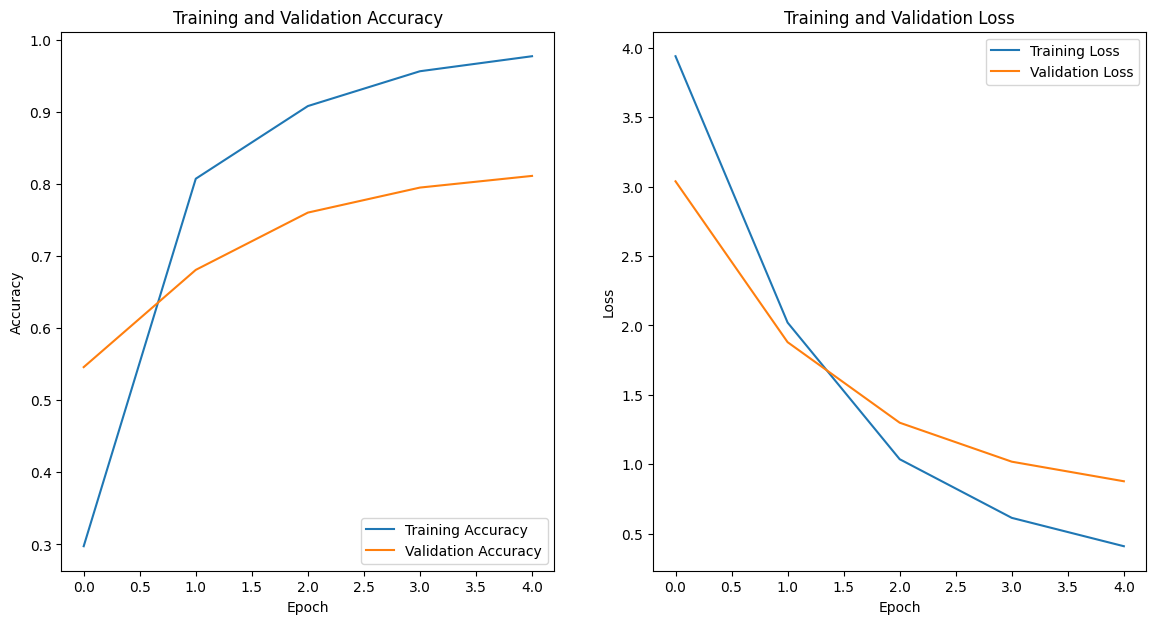

In [ ]:
def plot_model_loss_curves(history: tf.keras.callbacks.History) -> None:
  """Takes a History object and plots loss and accuracy curves."""

  # Get the accuracy values
  acc = history.history["accuracy"]
  val_acc = history.history["val_accuracy"]

  # Get the loss values
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  # Get the number of epochs
  epochs_range = range(len(acc))

  # Create accuracy curves plot
  plt.figure(figsize=(14, 7))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label="Training Accuracy")
  plt.plot(epochs_range, val_acc, label="Validation Accuracy")
  plt.legend(loc="lower right")
  plt.title("Training and Validation Accuracy")
  plt.xlabel("Epoch")
  plt.ylabel("Accuracy")

  # Create loss curves plot
  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label="Training Loss")
  plt.plot(epochs_range, val_loss, label="Validation Loss")
  plt.legend(loc="upper right")
  plt.title("Training and Validation Loss")
  plt.xlabel("Epoch")
  plt.ylabel("Loss")

  plt.show()

plot_model_loss_curves(history=history_0)

Woohoo! Now those are some nice looking curves.

Our model is doing exactly what we'd like it to do.

The accuracy is moving up while the loss is going down.

### Overfitting and underfitting (when your model doesn't perform how you'd like)

You may be wondering why there's a gap between the training and validation loss curves.

Ideally, the two lines would closely follow each other.

In our case, the validation loss doesn't decrease as low as the training loss.

This is known as [**overfitting**](https://developers.google.com/machine-learning/crash-course/generalization/peril-of-overfitting), a common problem in machine learning where a model learns the training data very well but doesn't generalize to other unseen data.

You can think of this as a university student memorizing the course materials but failing to apply that knowledge to problems that aren't in the course materials (real-world problems).

The reverse of overfitting is [**underfitting**](https://developers.google.com/machine-learning/glossary), which is when a model fails to learn anything useful. For example, it never manages to increase accuracy or decrease loss.

Good news is, our model isn't underfitting (it's performing at ~80% accuracy on unseen data).

I'll leave "[ways to fix overfitting](https://developers.google.com/machine-learning/glossary#overfitting)" as an extension.

But one of the best ways is to use more data.

And guess what?

We've got plenty more!

Reminder, these results were achieved using only 10% of the training data.

Before we train a model with more data, there's another way to quickly evaluate our model on a given dataset.

And that's using the [`tf.keras.Model.evaluate()`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate) method.

How about we try it on our `model_0`?

We'll save the outputs to a `model_0_results` variable so we can use them later.

In [ ]:
# Evaluate model_0, see: https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate
model_0_results = model_0.evaluate(x=test_ds)
model_0_results

269/269 [==============================] - 422s 2s/step - loss: 0.8765 - accuracy: 0.8114


[0.87654048204422, 0.8114219307899475]

Beautiful!

Evaluating our model on the test data shows it's performing at ~80% accuracy despite only seeing 10% of the training data.

We can also get the metrics used by our model with the `metrics_names` attribute.

In [ ]:
# Get our model's metrics names
model_0.metrics_names

['loss', 'accuracy']

## 9. Model 1 - Train a model on 100% of the training data

Time to step it up a notch!

We've trained a model on 10% of the training data (to see if it works and it did!), now let's train a model on 100% of the training data and see what happens.

But before we do...

What do you think will happen?

If our model was able to perform well on only 10% of the data, how do you think it will go on 100% of the data?

These types of questions are good to think about in the world of machine learning.

After all, that's why the machine learner's motto is *experiment, experiment, experiment!*

Let's follow our three steps from before:

1. Create a model (using our `create_model()`) function.
2. Compile our model (selecting our optimizer, loss function and evaluation metric).
3. Fit our model (this time on 100% of the data for 5 epochs).

> **Note:** Fitting our model on such a large amount of data will take a *long* time without a GPU. If you're using Google Colab, you can access a GPU via Runtime -> Change runtime type -> Hardware accelerator -> GPU.

In [ ]:
model_1 = create_model(num_classes=len(class_names),
                      model_name="model_1")

In [ ]:
# 2. Compile model
model_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss="categorical_crossentropy",
                metrics=["accuracy"])

In [ ]:
train_ds.element_spec

(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 120), dtype=tf.float32, name=None))

In [ ]:
# 3. Fit model
epochs=5
history_1 = model_1.fit(x=train_ds,
                        epochs=epochs,
                        validation_data=test_ds)

Epoch 1/5
375/375 [==============================] - ETA: 0s - loss: 1.2872 - accuracy: 0.7553